In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('House_Price.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

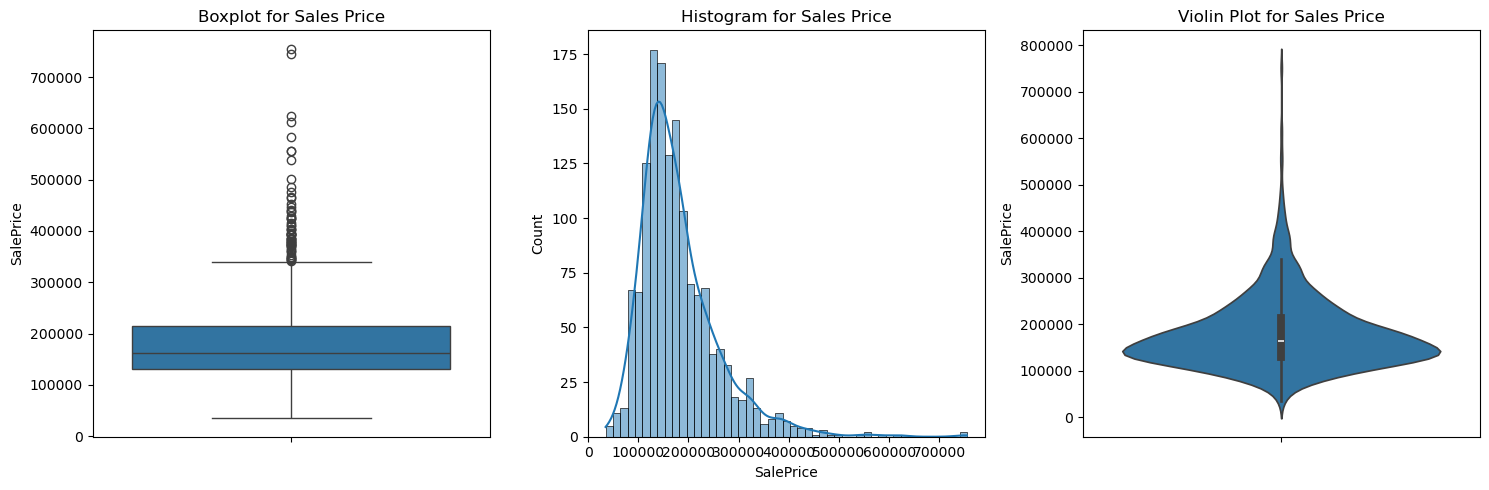

In [5]:
plt.figure(figsize = (15,5))

# Box Plot for SalePrice
plt.subplot(1,3,1)
sns.boxplot(y = df['SalePrice'])
plt.title('Boxplot for Sales Price')

# Histogram for SalePrice
plt.subplot(1,3,2)
sns.histplot(df['SalePrice'], kde = True)
plt.title('Histogram for Sales Price')

# Voilin Plot for SalePrice
plt.subplot(1,3,3)
sns.violinplot(y = df['SalePrice'])
plt.title('Violin Plot for Sales Price')

plt.tight_layout()
plt.show()

The SalePrice distribution is right-skewed with most values between 100,000 and 200,000. There are significant high-end outliers above 325,000 that may impact modeling

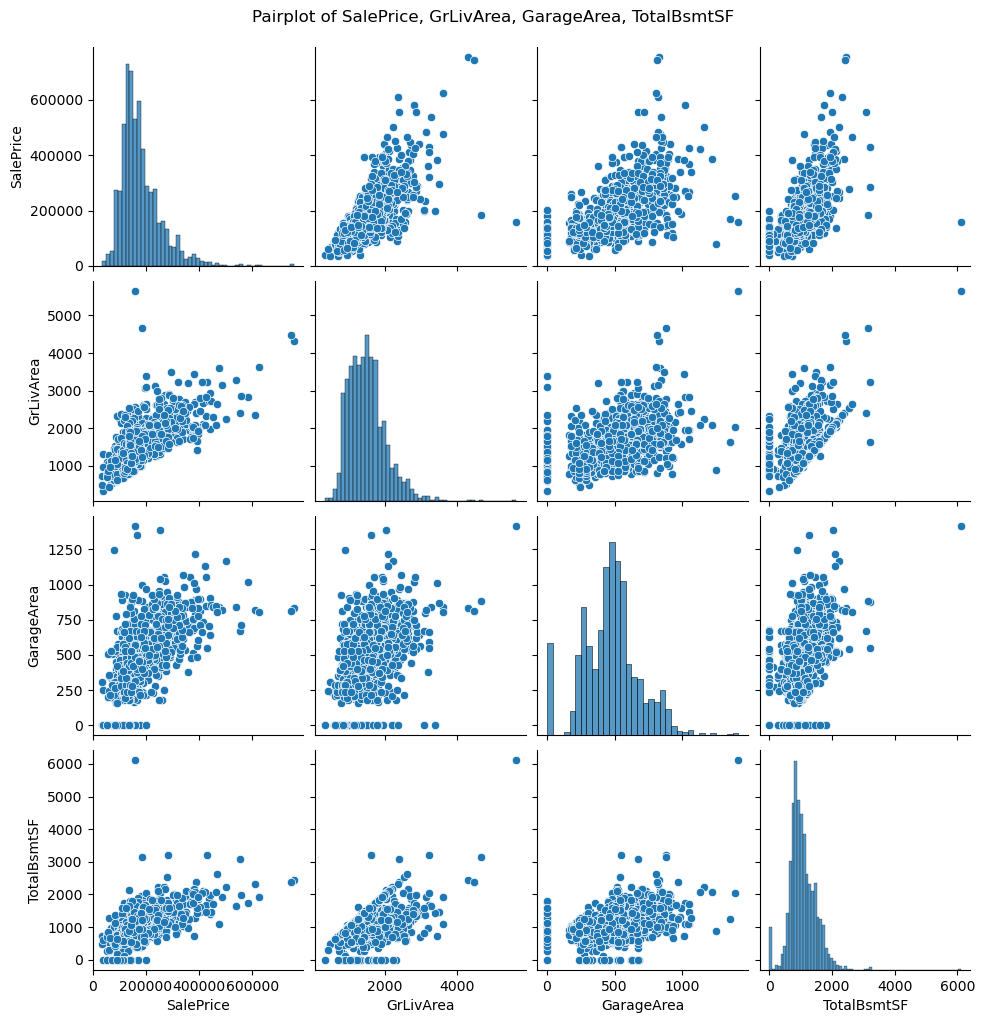

In [7]:
# pairplot for 'SalePrice','GrLivArea','GarageArea','TotalBsmtSF'
a = ['SalePrice','GrLivArea','GarageArea','TotalBsmtSF']
df1 = df[a]
sns.pairplot(df1)
plt.suptitle('Pairplot of SalePrice, GrLivArea, GarageArea, TotalBsmtSF', y = 1.02)
plt.show()

SalePrice shows strong positive correlation with GrLivArea and moderate correlation with TotalBsmtSF and GarageArea. Most variables are right-skewed and have some outliers, especially at higher values.

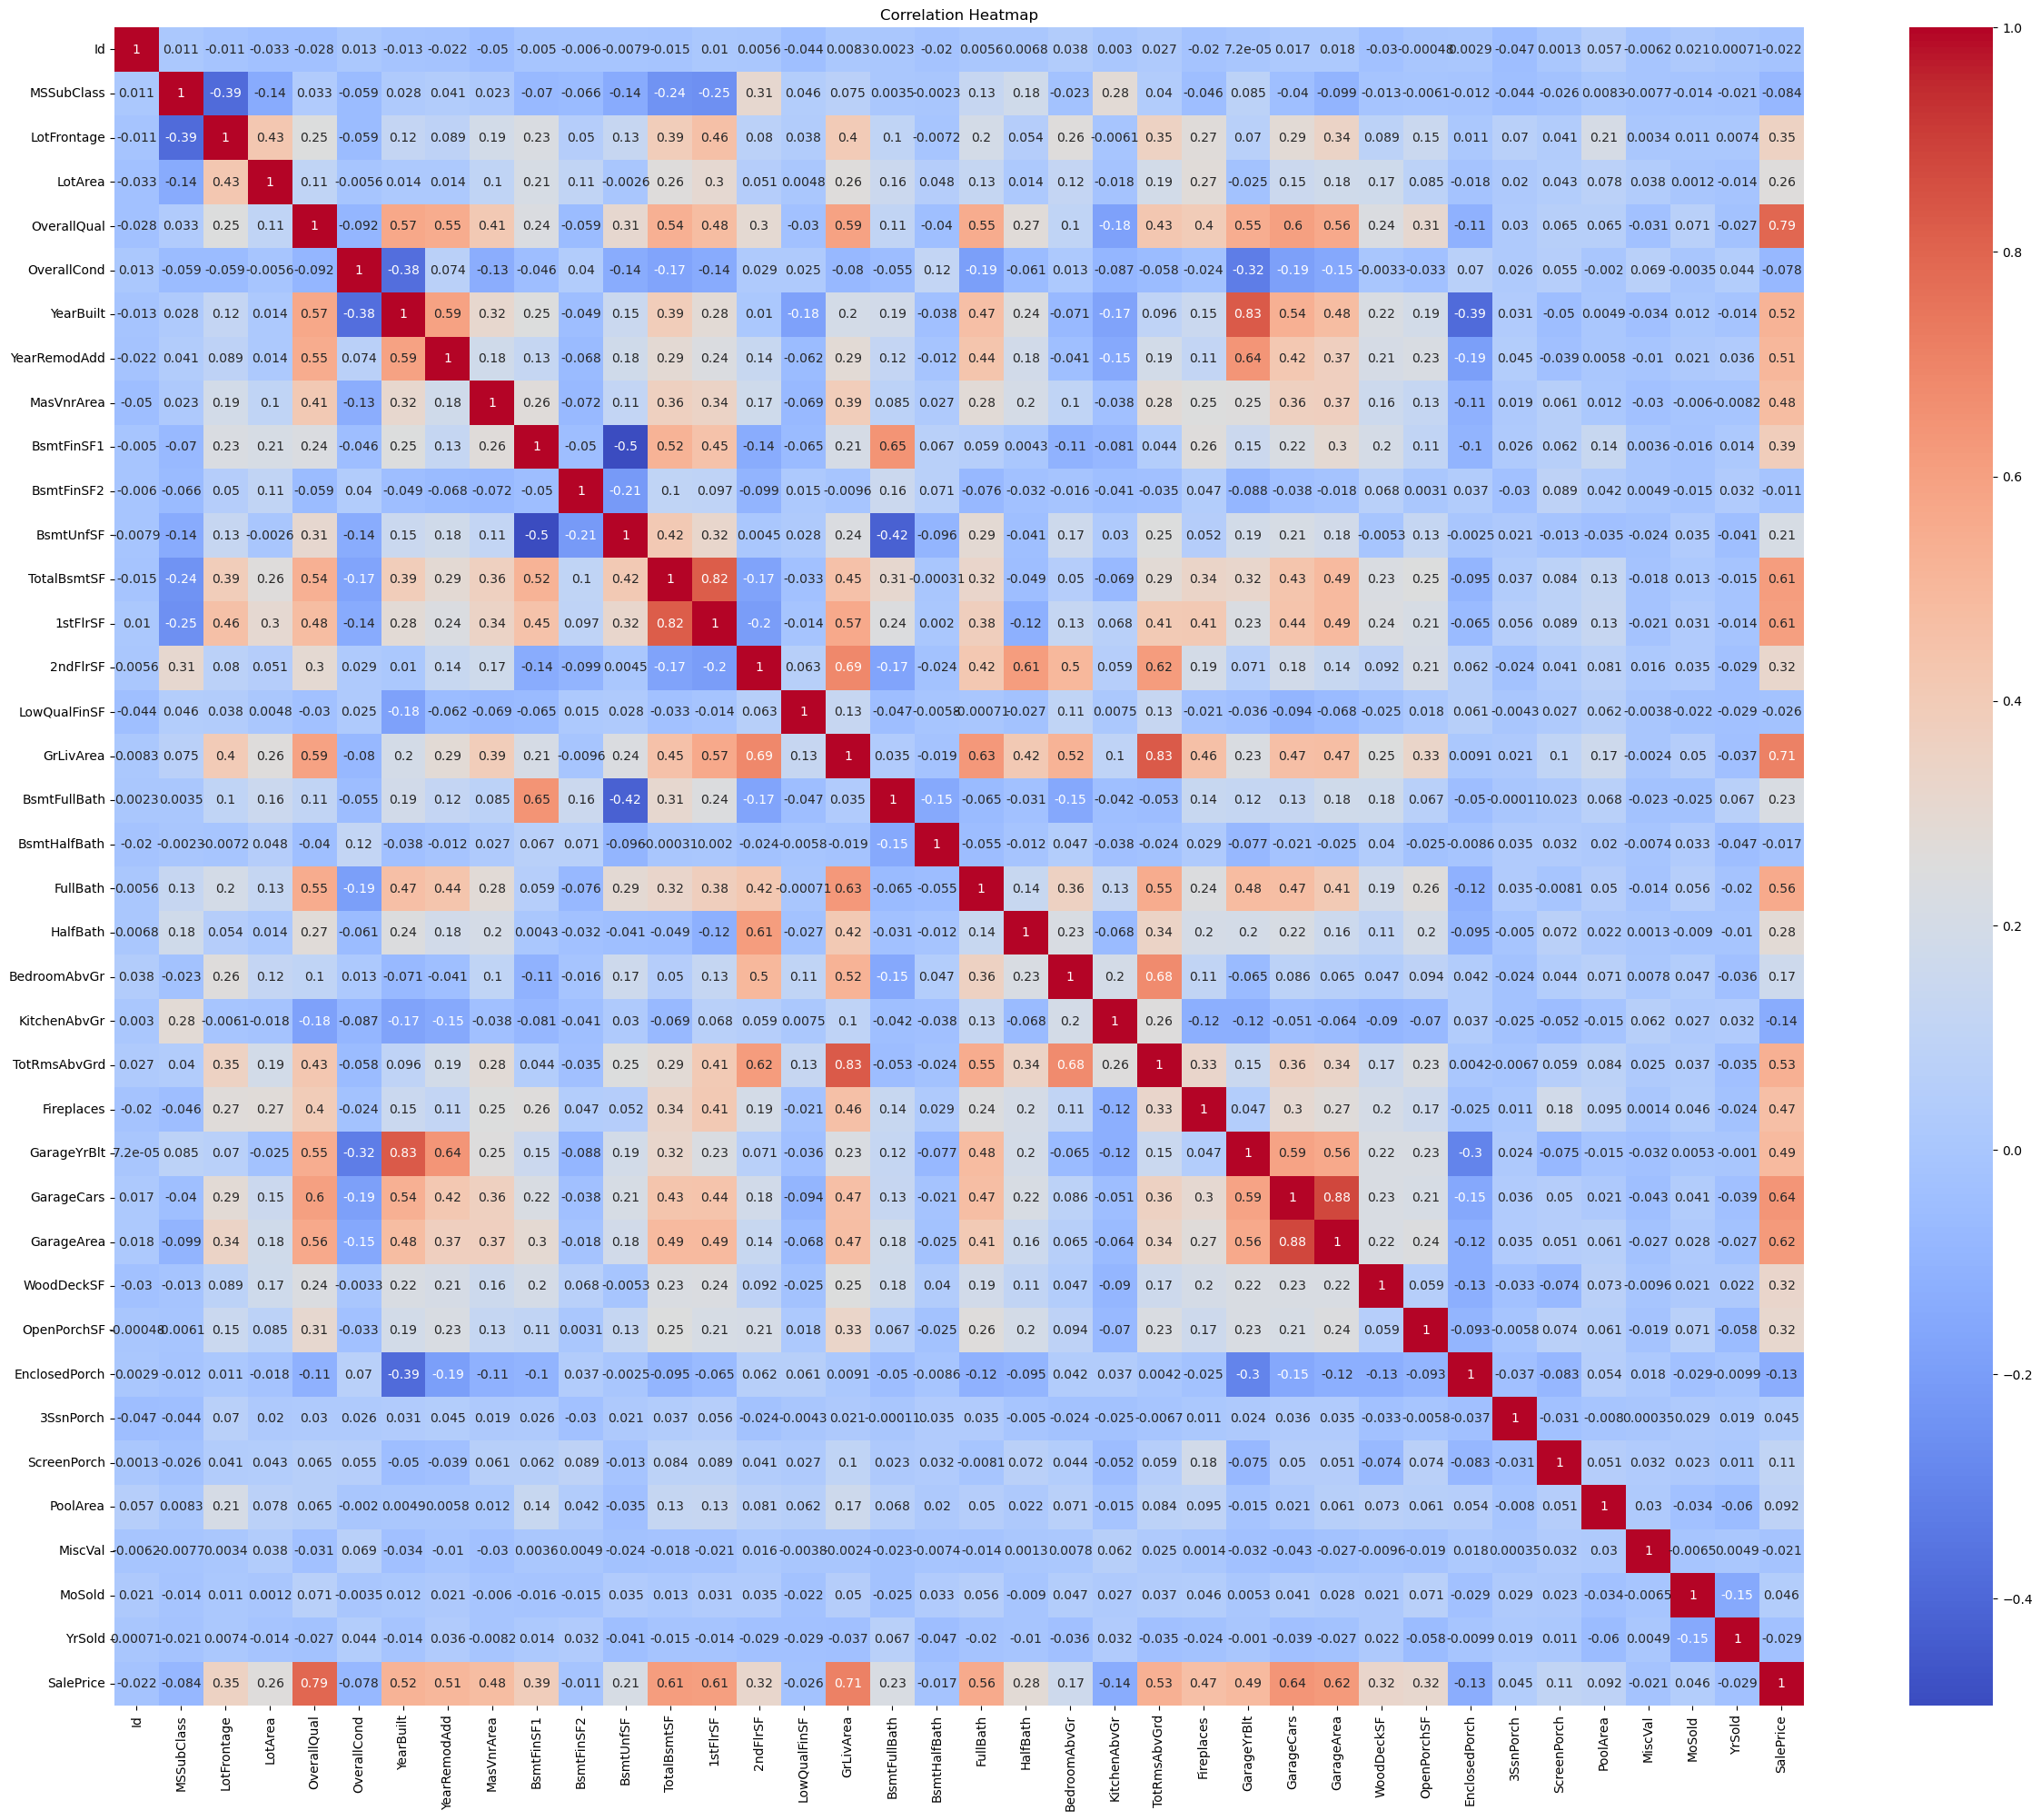

In [9]:
# heatmap for correlationships

# Calculate the correlation matrix
corr = df.corr(numeric_only = True)

# Set up the plot size
plt.figure(figsize = (30,24))

# Heatmap
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

plt.title('Correlation Heatmap')
plt.show()

SalePrice is highly correlated with OverallQual (0.81), GrLivArea (0.70), GarageCars (0.64), and TotalBsmtSF (0.61), indicating these are key predictors. Most other features show weak to moderate correlation with SalePrice.

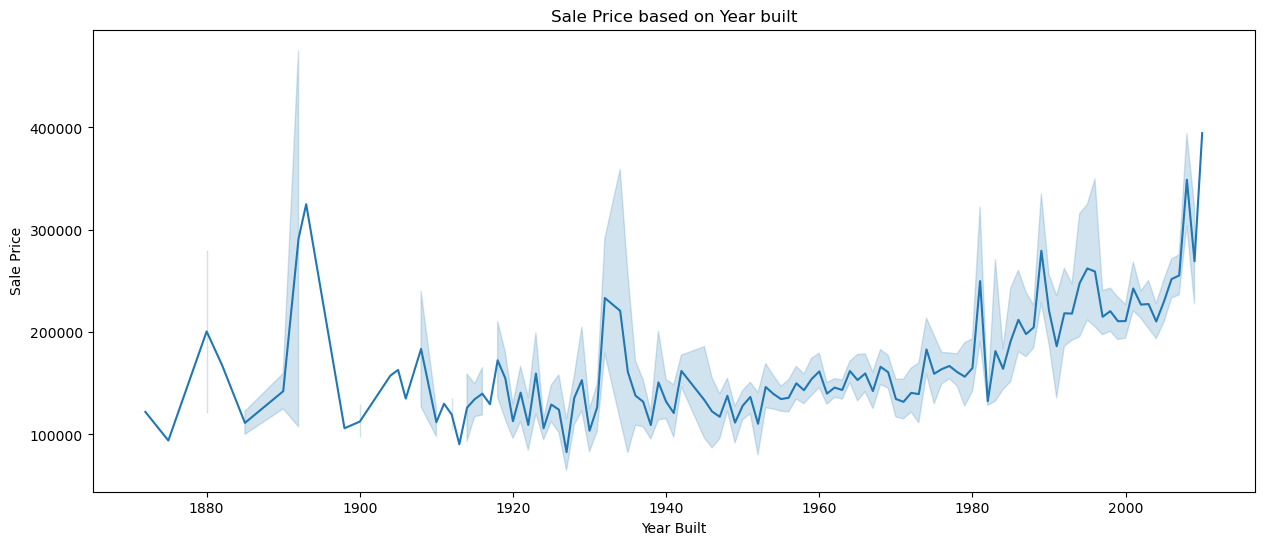

In [11]:
# line plot for YearBuilt, SalePrice
plt.figure(figsize = (15,6))
sns.lineplot(x = 'YearBuilt',y = 'SalePrice',data = df)
plt.title('Sale Price based on Year built', loc = 'center')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

In [12]:
num=df.select_dtypes(include=np.number)
num

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 38 columns]

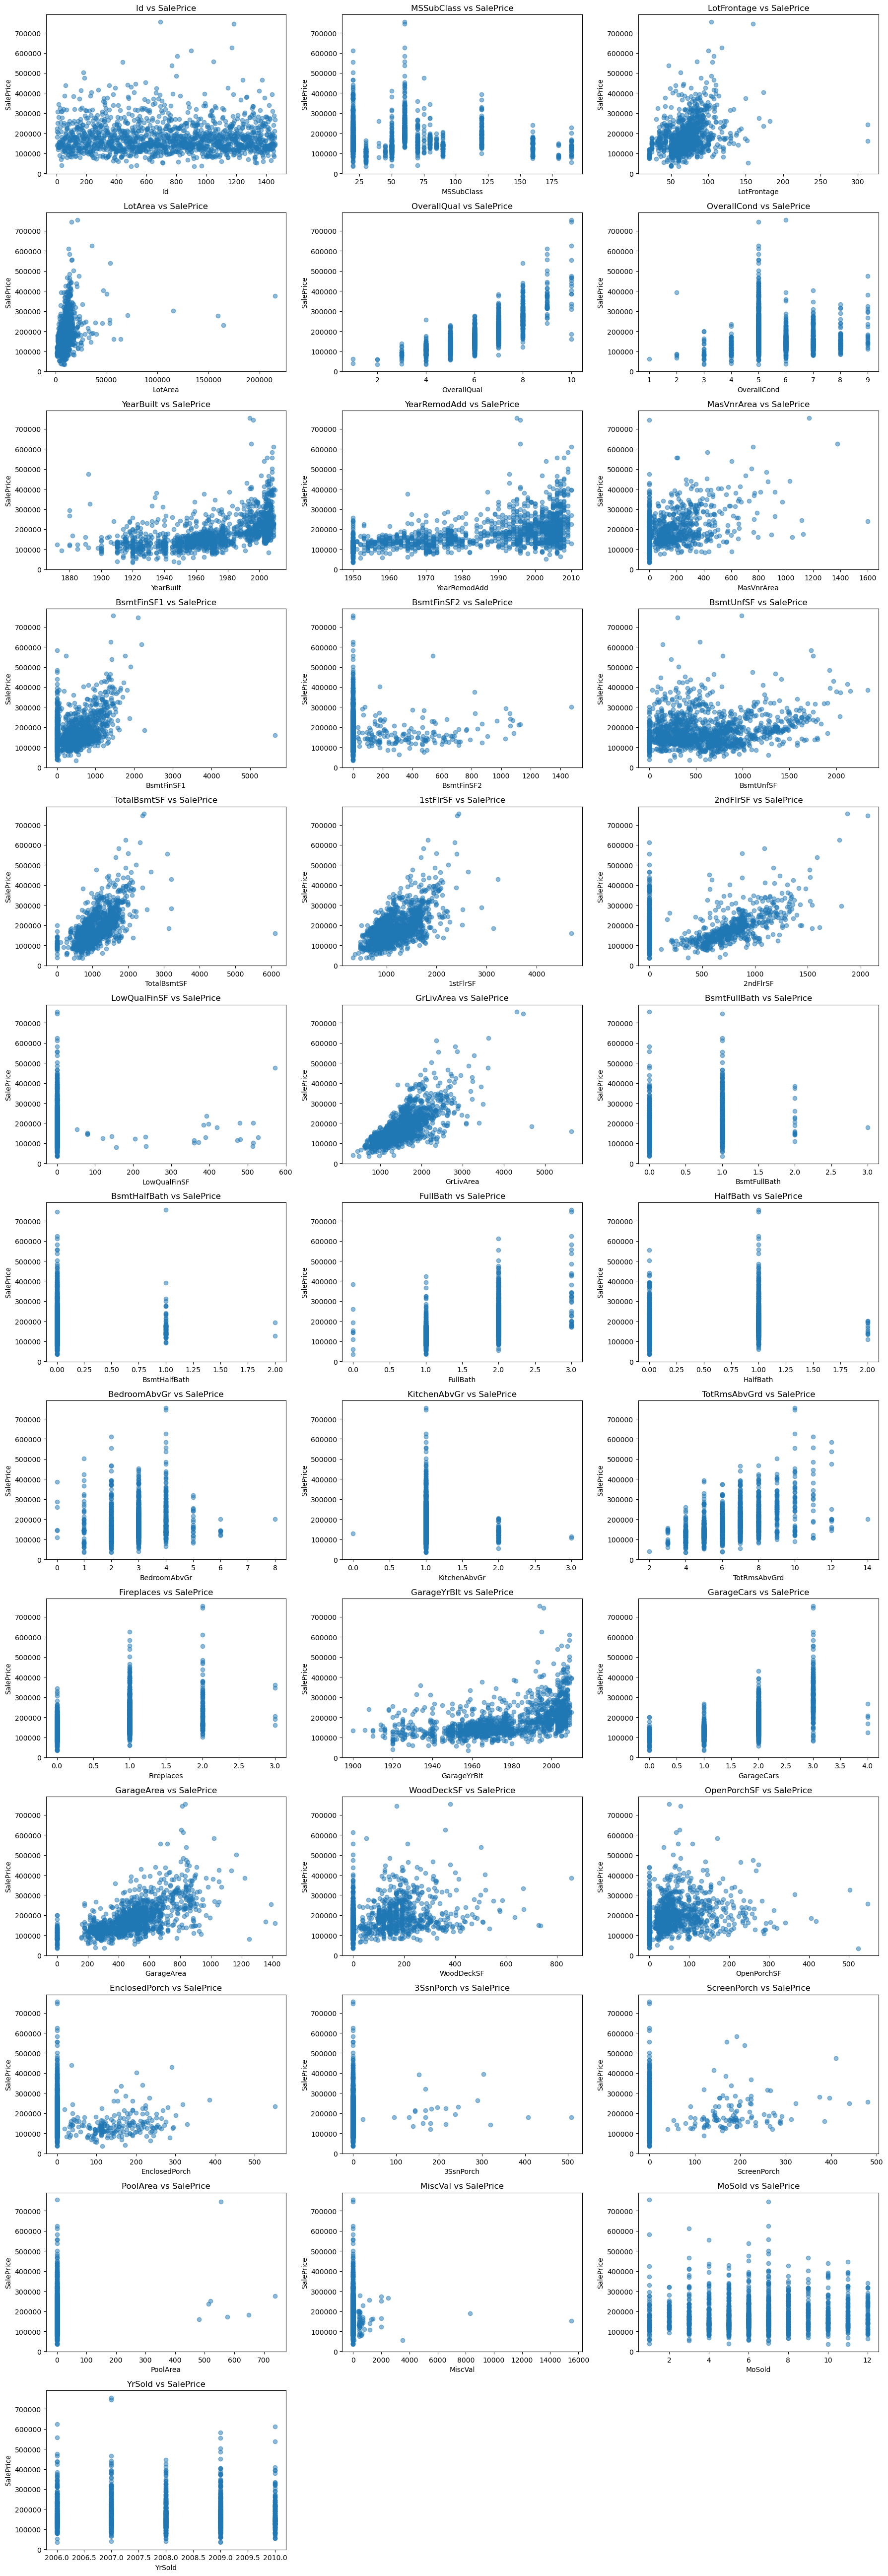

In [13]:
# Assume numeric_columns is already defined and 'SalePrice' is your target
features = [col for col in num if col != 'SalePrice']

# Plot all scatter plots in a grid for easy comparison:
n = len(features)
ncols = 3
nrows = (n + ncols - 1) // ncols
plt.figure(figsize=(6 * ncols, 4 * nrows))

for idx, feature in enumerate(features, 1):
    plt.subplot(nrows, ncols, idx)
    plt.scatter(num[feature], num['SalePrice'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f"{feature} vs SalePrice")

plt.tight_layout()
plt.show()

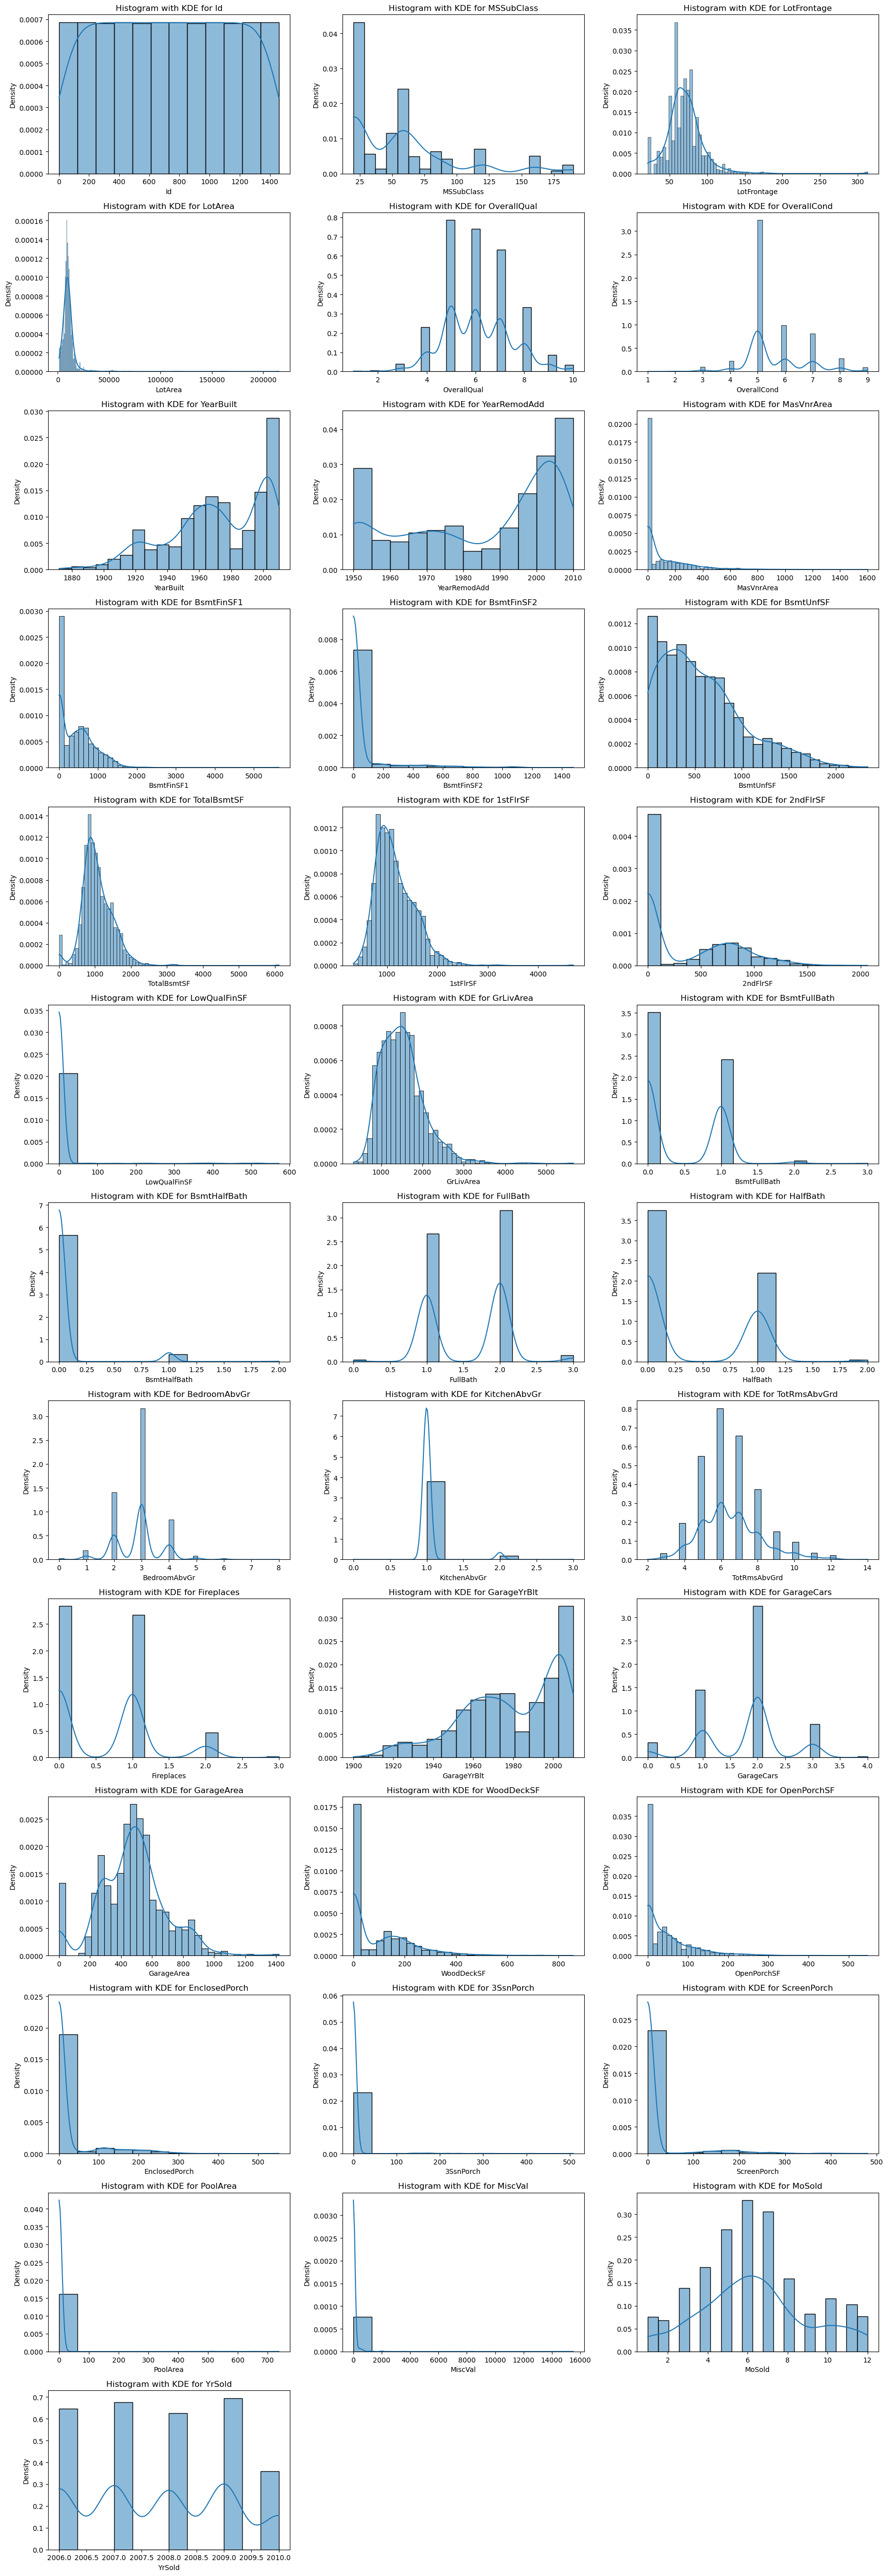

In [14]:
# Assume numeric_columns is already defined and 'SalePrice' is your target
features = [col for col in num if col != 'SalePrice']

# Plot all scatter plots in a grid for easy comparison:
n = len(features)
ncols = 3
nrows = (n + ncols - 1) // ncols
plt.figure(figsize=(6 * ncols, 4 * nrows))

for idx, feature in enumerate(features, 1):
    plt.subplot(nrows, ncols, idx)
    sns.histplot(num[feature], kde=True, stat="density")
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f"Histogram with KDE for {feature}")

plt.tight_layout()
plt.show()

In [15]:
num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [16]:
p = (num.isnull().sum() / num.shape[0]) * 100
print(p.round(2).astype(str) + '%')

Id                 0.0%
MSSubClass         0.0%
LotFrontage      17.74%
LotArea            0.0%
OverallQual        0.0%
OverallCond        0.0%
YearBuilt          0.0%
YearRemodAdd       0.0%
MasVnrArea        0.55%
BsmtFinSF1         0.0%
BsmtFinSF2         0.0%
BsmtUnfSF          0.0%
TotalBsmtSF        0.0%
1stFlrSF           0.0%
2ndFlrSF           0.0%
LowQualFinSF       0.0%
GrLivArea          0.0%
BsmtFullBath       0.0%
BsmtHalfBath       0.0%
FullBath           0.0%
HalfBath           0.0%
BedroomAbvGr       0.0%
KitchenAbvGr       0.0%
TotRmsAbvGrd       0.0%
Fireplaces         0.0%
GarageYrBlt       5.55%
GarageCars         0.0%
GarageArea         0.0%
WoodDeckSF         0.0%
OpenPorchSF        0.0%
EnclosedPorch      0.0%
3SsnPorch          0.0%
ScreenPorch        0.0%
PoolArea           0.0%
MiscVal            0.0%
MoSold             0.0%
YrSold             0.0%
SalePrice          0.0%
dtype: object


In [17]:
num.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [18]:
num['GarageYrBlt'] = num['GarageYrBlt'].fillna(num['GarageYrBlt'].mean())
num['MasVnrArea'] = num['MasVnrArea'].fillna(num['MasVnrArea'].median())
num['LotFrontage'] = num['LotFrontage'].fillna(num['LotFrontage'].median())

In [19]:
num.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

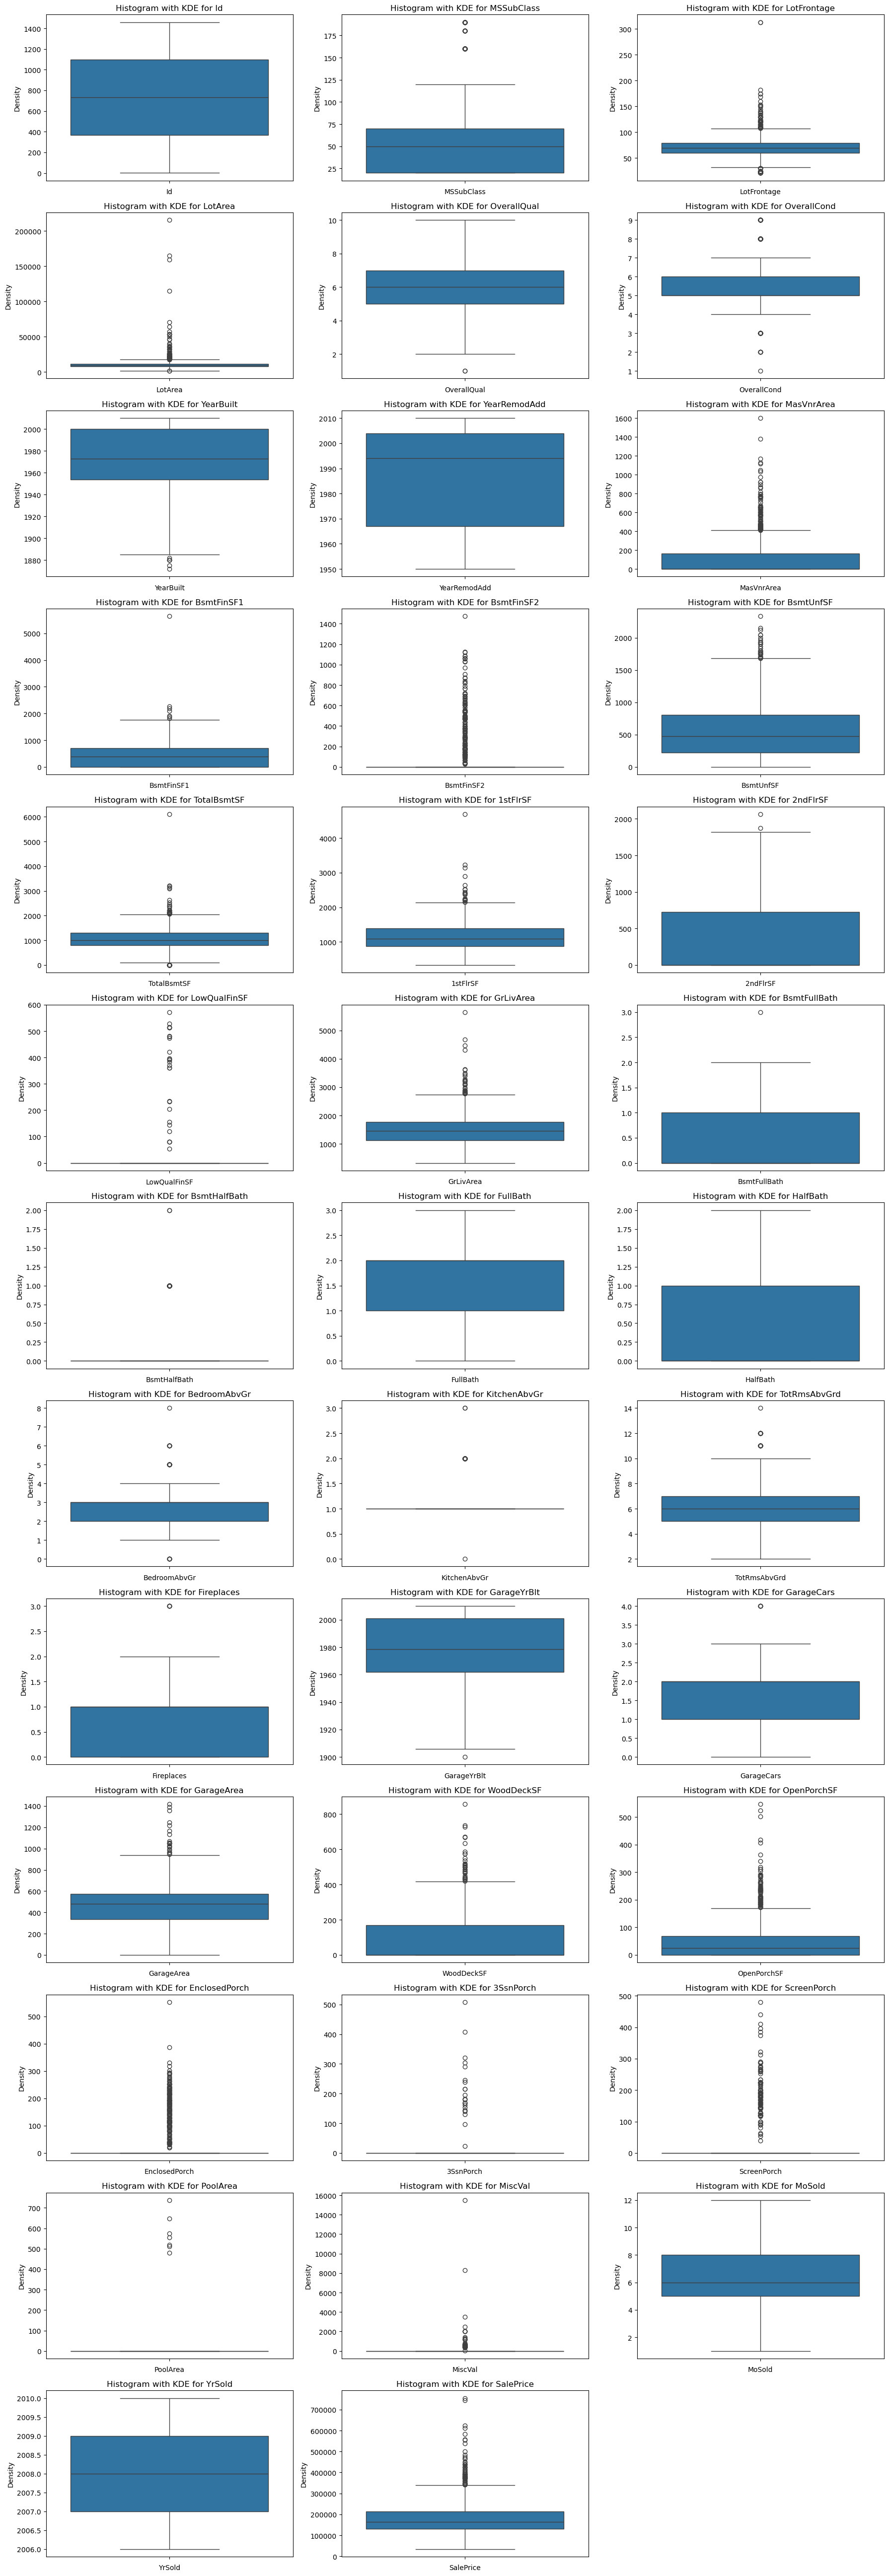

In [20]:
features = [col for col in num]

# Plot all scatter plots in a grid for easy comparison:
n = len(features)
ncols = 3
nrows = (n + ncols - 1) // ncols
plt.figure(figsize=(6 * ncols, 4 * nrows))

for idx, feature in enumerate(features, 1):
    plt.subplot(nrows, ncols, idx)
    sns.boxplot(num[feature])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f"Histogram with KDE for {feature}")

plt.tight_layout()
plt.show()

In [21]:
outliers_iqr = {}

for col in num:
    Q1 = num[col].quantile(0.25)
    Q3 = num[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_mask = (num[col] < lower_bound) | (num[col] > upper_bound)
    outliers_iqr[col] = num[col][outlier_mask]

# outliers_iqr is a dictionary: column name -> series of outliers in that column

In [22]:
outlier_counts = {col: outliers_iqr[col].shape[0] for col in num}
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'NumOutliers'])
print(outlier_counts_df.shape)
print(outlier_counts_df.sort_values('NumOutliers', ascending=False))


(38, 2)
           Column  NumOutliers
30  EnclosedPorch          208
10     BsmtFinSF2          167
5     OverallCond          125
32    ScreenPorch          116
2     LotFrontage          106
1      MSSubClass          103
8      MasVnrArea           98
18   BsmtHalfBath           82
29    OpenPorchSF           77
3         LotArea           69
22   KitchenAbvGr           68
12    TotalBsmtSF           61
37      SalePrice           61
34        MiscVal           52
21   BedroomAbvGr           35
28     WoodDeckSF           32
16      GrLivArea           31
23   TotRmsAbvGrd           30
11      BsmtUnfSF           29
15   LowQualFinSF           26
31      3SsnPorch           24
27     GarageArea           21
13       1stFlrSF           20
33       PoolArea            7
9      BsmtFinSF1            7
6       YearBuilt            7
24     Fireplaces            5
26     GarageCars            5
14       2ndFlrSF            2
4     OverallQual            2
25    GarageYrBlt            1


In [23]:
# Columns to cap (outliers > 7, numerical only)
columns_to_cap = [
    'EnclosedPorch', 'BsmtFinSF2', 'ScreenPorch', 'LotFrontage', 'MasVnrArea',
    'BsmtHalfBath', 'OpenPorchSF', 'LotArea', 'KitchenAbvGr', 'TotalBsmtSF',
    'SalePrice', 'MiscVal', 'BedroomAbvGr', 'WoodDeckSF', 'GrLivArea',
    'TotRmsAbvGrd', 'BsmtUnfSF', 'LowQualFinSF', '3SsnPorch', 'GarageArea',
    '1stFlrSF'
    # Remove 'OverallCond', 'MSSubClass' as they are categorical/ordinal
]

# Cap only upper outliers using IQR
def cap_upper_outliers(num, columns, iqr_multiplier=1.5):
    for col in columns:
        Q1 = num[col].quantile(0.25)
        Q3 = num[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + iqr_multiplier * IQR
        num[col] = np.where(num[col] > upper_bound, upper_bound, num[col])
    return num

num = cap_upper_outliers(num, columns_to_cap)
num.shape

(1460, 38)

In [24]:
# List of columns to check for low outliers (<= 7, numerical only)
columns_to_remove_low = [
    'PoolArea', 'BsmtFinSF1', 'YearBuilt', 'Fireplaces',
    'GarageCars', '2ndFlrSF', 'GarageYrBlt', 'BsmtFullBath',
    'MoSold', 'YrSold', 'HalfBath', 'YearRemodAdd', 'FullBath'
    # 'OverallQual', 'Id' not included: ordinal/categorical/identifier
]

def remove_low_outliers(num, columns, iqr_multiplier=1.5, return_rows=False):
    """
    Removes low outliers (below IQR-based lower bound) for specified columns.
    Returns filtered DataFrame and set of removed row indices.
    Optionally, also returns a DataFrame of the removed rows.
    """
    removed_indices = set()
    original_indices = set(num.index)
    for col in columns:
        Q1 = num[col].quantile(0.25)
        Q3 = num[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - iqr_multiplier * IQR
        # Record which rows would be removed for this column
        mask = num[col] < lower_bound
        removed = num[mask].index
        removed_indices.update(removed)
        # Filter the DataFrame
        num = num[num[col] >= lower_bound]
    final_indices = set(num.index)
    actually_removed = original_indices - final_indices
    print(f"Total unique outlier row indices removed: {len(actually_removed)}")
    if return_rows:
        # optional: return also the DataFrame of removed rows
        return num, actually_removed
    else:
        return num, actually_removed

# Usage:
# 1. Safeguard the original DataFrame, if you want to examine removed rows later
original_num = num.copy()

# 2. Remove outliers and get removed indices
num, removed_rows = remove_low_outliers(num, columns_to_remove_low)

print(f"Removed {len(removed_rows)} rows.")

# 3. If you want to see the removed rows themselves:
removed_rows_df = original_num.loc[list(removed_rows)]
print(removed_rows_df)


Total unique outlier row indices removed: 8
Removed 8 rows.
        Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
1349  1350          70         50.0   5250.0            8            5   
747    748          70         65.0  11700.0            7            7   
1132  1133          70         90.0   9900.0            6            4   
304    305          75         87.0  17673.5            7            9   
1137  1138          50         54.0   6342.0            5            8   
630    631          70         50.0   9000.0            5            6   
93      94         190         60.0   7200.0            6            6   
991    992          70        107.5  17671.0            8            9   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
1349       1872          1987         0.0         259  ...         0.0   
747        1880          2003         0.0           0  ...       181.0   
1132       1880          1950         0.0          

In [25]:
print(num.shape)
print(num.head())

(1452, 38)
   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0   8450.0            7            5       2003   
1   2          20         80.0   9600.0            6            8       1976   
2   3          60         68.0  11250.0            7            5       2001   
3   4          70         60.0   9550.0            7            5       1915   
4   5          60         84.0  14260.0            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...         0.0         61.0   
1          1976         0.0         978  ...       298.0          0.0   
2          2002       162.0         486  ...         0.0         42.0   
3          1970         0.0         216  ...         0.0         35.0   
4          2000       350.0         655  ...       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  

In [26]:
for i in num:
    print(num[i].value_counts())

Id
1       1
980     1
978     1
977     1
976     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1452, dtype: int64
MSSubClass
20     536
60     299
50     143
120     87
30      69
160     63
80      58
70      55
90      52
190     29
85      20
75      15
45      12
180     10
40       4
Name: count, dtype: int64
LotFrontage
69.0     270
60.0     142
70.0      70
80.0      69
107.5     57
        ... 
39.0       1
38.0       1
106.0      1
33.0       1
46.0       1
Name: count, Length: 80, dtype: int64
LotArea
17673.5    66
9600.0     24
7200.0     24
6000.0     17
10800.0    14
           ..
10289.0     1
12243.0     1
1526.0      1
9490.0      1
9717.0      1
Name: count, Length: 1005, dtype: int64
OverallQual
5     395
6     372
7     317
8     166
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
OverallCond
5    820
6    250
7    204
8     71
4     56
3     25
9     20
2      5
1      1
Name: count, dtype:

In [27]:
num[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
 '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF','OpenPorchSF', 'PoolArea']].skew()

LotFrontage     -0.129753
LotArea          0.201071
MasVnrArea       1.279581
BsmtFinSF1       1.685405
BsmtFinSF2       0.000000
BsmtUnfSF        0.802204
TotalBsmtSF      0.186223
1stFlrSF         0.663698
2ndFlrSF         0.812642
LowQualFinSF     0.000000
GrLivArea        0.595935
GarageArea      -0.068521
WoodDeckSF       1.082365
OpenPorchSF      1.133375
PoolArea        14.787221
dtype: float64

In [28]:
num.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0   8450.0            7            5       2003   
1   2          20         80.0   9600.0            6            8       1976   
2   3          60         68.0  11250.0            7            5       2001   
3   4          70         60.0   9550.0            7            5       1915   
4   5          60         84.0  14260.0            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...         0.0         61.0   
1          1976         0.0         978  ...       298.0          0.0   
2          2002       162.0         486  ...         0.0         42.0   
3          1970         0.0         216  ...         0.0         35.0   
4          2000       350.0         655  ...       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0         0      0.0       2    2008   
1            0.0        0.0          0.0         0      0.0       5    2007   
2            0.0        0.0          0.0         0      0.0       9    2008   
3            0.0        0.0          0.0         0      0.0       2    2006   
4            0.0        0.0          0.0         0      0.0      12    2008   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0  

[5 rows x 38 columns]

In [29]:
# heatmap for correlationships

# Calculate the correlation matrix
corr = num.corr()

print(corr['SalePrice'])

Id              -0.024911
MSSubClass      -0.084709
LotFrontage      0.376711
LotArea          0.434337
OverallQual      0.819362
OverallCond     -0.079608
YearBuilt        0.582042
YearRemodAdd     0.552859
MasVnrArea       0.452010
BsmtFinSF1       0.372477
BsmtFinSF2            NaN
BsmtUnfSF        0.213991
TotalBsmtSF      0.643250
1stFlrSF         0.621320
2ndFlrSF         0.318039
LowQualFinSF          NaN
GrLivArea        0.733901
BsmtFullBath     0.239998
BsmtHalfBath          NaN
FullBath         0.585913
HalfBath         0.294288
BedroomAbvGr     0.198241
KitchenAbvGr     0.019504
TotRmsAbvGrd     0.541985
Fireplaces       0.485624
GarageYrBlt      0.504896
GarageCars       0.671084
GarageArea       0.658108
WoodDeckSF       0.340277
OpenPorchSF      0.397725
EnclosedPorch         NaN
3SsnPorch             NaN
ScreenPorch           NaN
PoolArea         0.055949
MiscVal               NaN
MoSold           0.070936
YrSold          -0.032335
SalePrice        1.000000
Name: SalePr

In [30]:
import numpy as np
import pandas as pd

# Step 1: Correlation matrix
corr_matrix = num.corr()

# Step 2: Absolute correlation with target
target = 'SalePrice'
abs_corr_with_target = corr_matrix[target].abs().sort_values(ascending=False)

# Step 3: Select features with |correlation| ≥ threshold, excluding target itself
threshold = 0.3
selected_features = abs_corr_with_target[abs_corr_with_target >= threshold].index.tolist()
selected_features = [f for f in selected_features if f != target]

# Step 4: Forcefully include 'YrSold' if not already selected
if 'YrSold' not in selected_features:
    selected_features.append('YrSold')

# Step 5: Final DataFrame with selected features + SalePrice
num = num[selected_features + [target]]

# Output
print("Selected Features:", selected_features)



Selected Features: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'TotRmsAbvGrd', 'GarageYrBlt', 'Fireplaces', 'MasVnrArea', 'LotArea', 'OpenPorchSF', 'LotFrontage', 'BsmtFinSF1', 'WoodDeckSF', '2ndFlrSF', 'YrSold']


In [31]:
print(num.head())
print(num.shape)

   OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7     1710.0           2       548.0        856.0     856.0   
1            6     1262.0           2       460.0       1262.0    1262.0   
2            7     1786.0           2       608.0        920.0     920.0   
3            7     1717.0           3       642.0        756.0     961.0   
4            8     2198.0           3       836.0       1145.0    1145.0   

   FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  ...  Fireplaces  \
0         2       2003          2003           8.0  ...           0   
1         2       1976          1976           6.0  ...           1   
2         2       2001          2002           6.0  ...           1   
3         1       1915          1970           7.0  ...           1   
4         2       2000          2000           9.0  ...           1   

   MasVnrArea  LotArea  OpenPorchSF  LotFrontage  BsmtFinSF1  WoodDeckSF  \
0       196.0   8450.0         61.0     

In [32]:
cat=df.select_dtypes(include=['object']) 
cat

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

In [33]:
cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [34]:
cat.shape

(1460, 43)

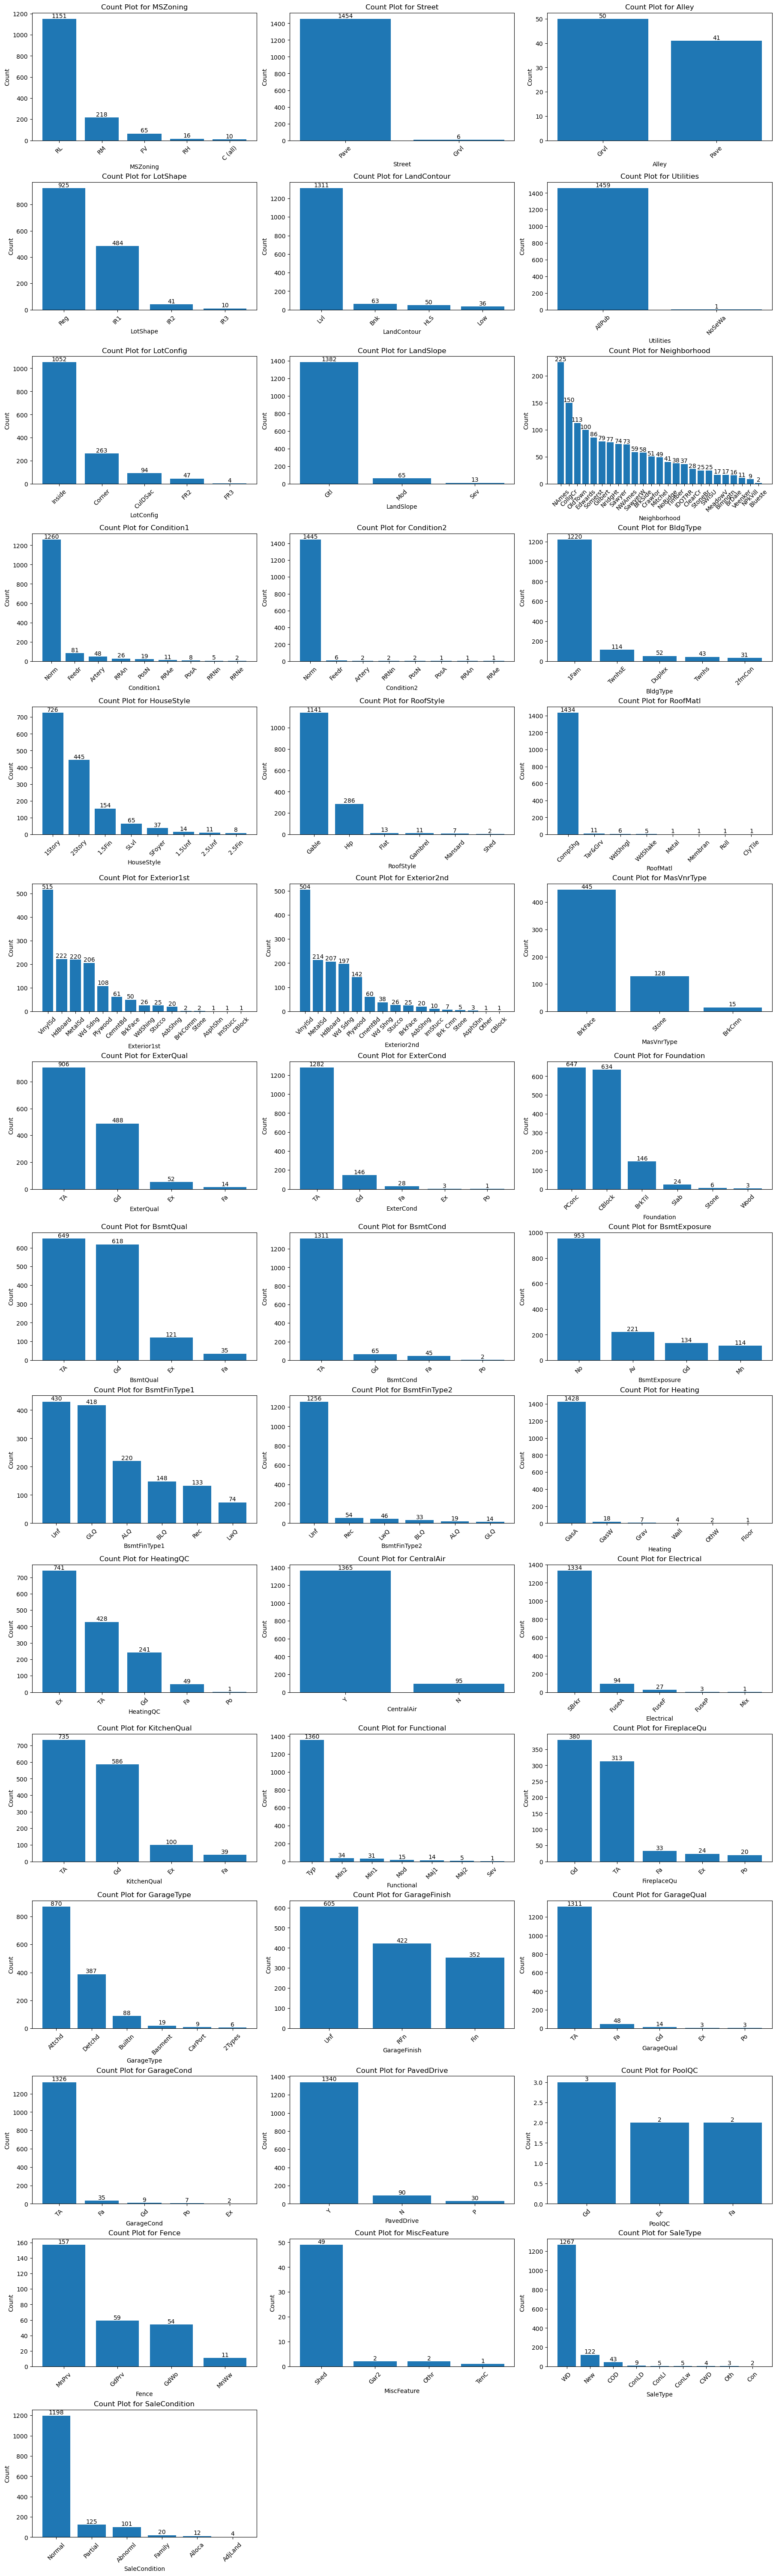

In [35]:
# Assume categorical_cols is your list of column names
n = len(cat.columns)
ncols = 3
nrows = (n + ncols - 1) // ncols

fig, axes = plt.subplots(nrows, ncols, figsize=(6*ncols, 4*nrows), constrained_layout=True)
axes = axes.flatten()

for idx, col in enumerate(cat):
    # Get value counts
    counts = df[col].value_counts()
    bars = axes[idx].bar(counts.index.astype(str), counts.values)
    axes[idx].set_title(f'Count Plot for {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

    # Annotate each bar with its height (count)
    for bar in bars:
        axes[idx].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            int(bar.get_height()),
            ha='center',
            va='bottom'
        )

# Hide unused axes
for j in range(idx + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

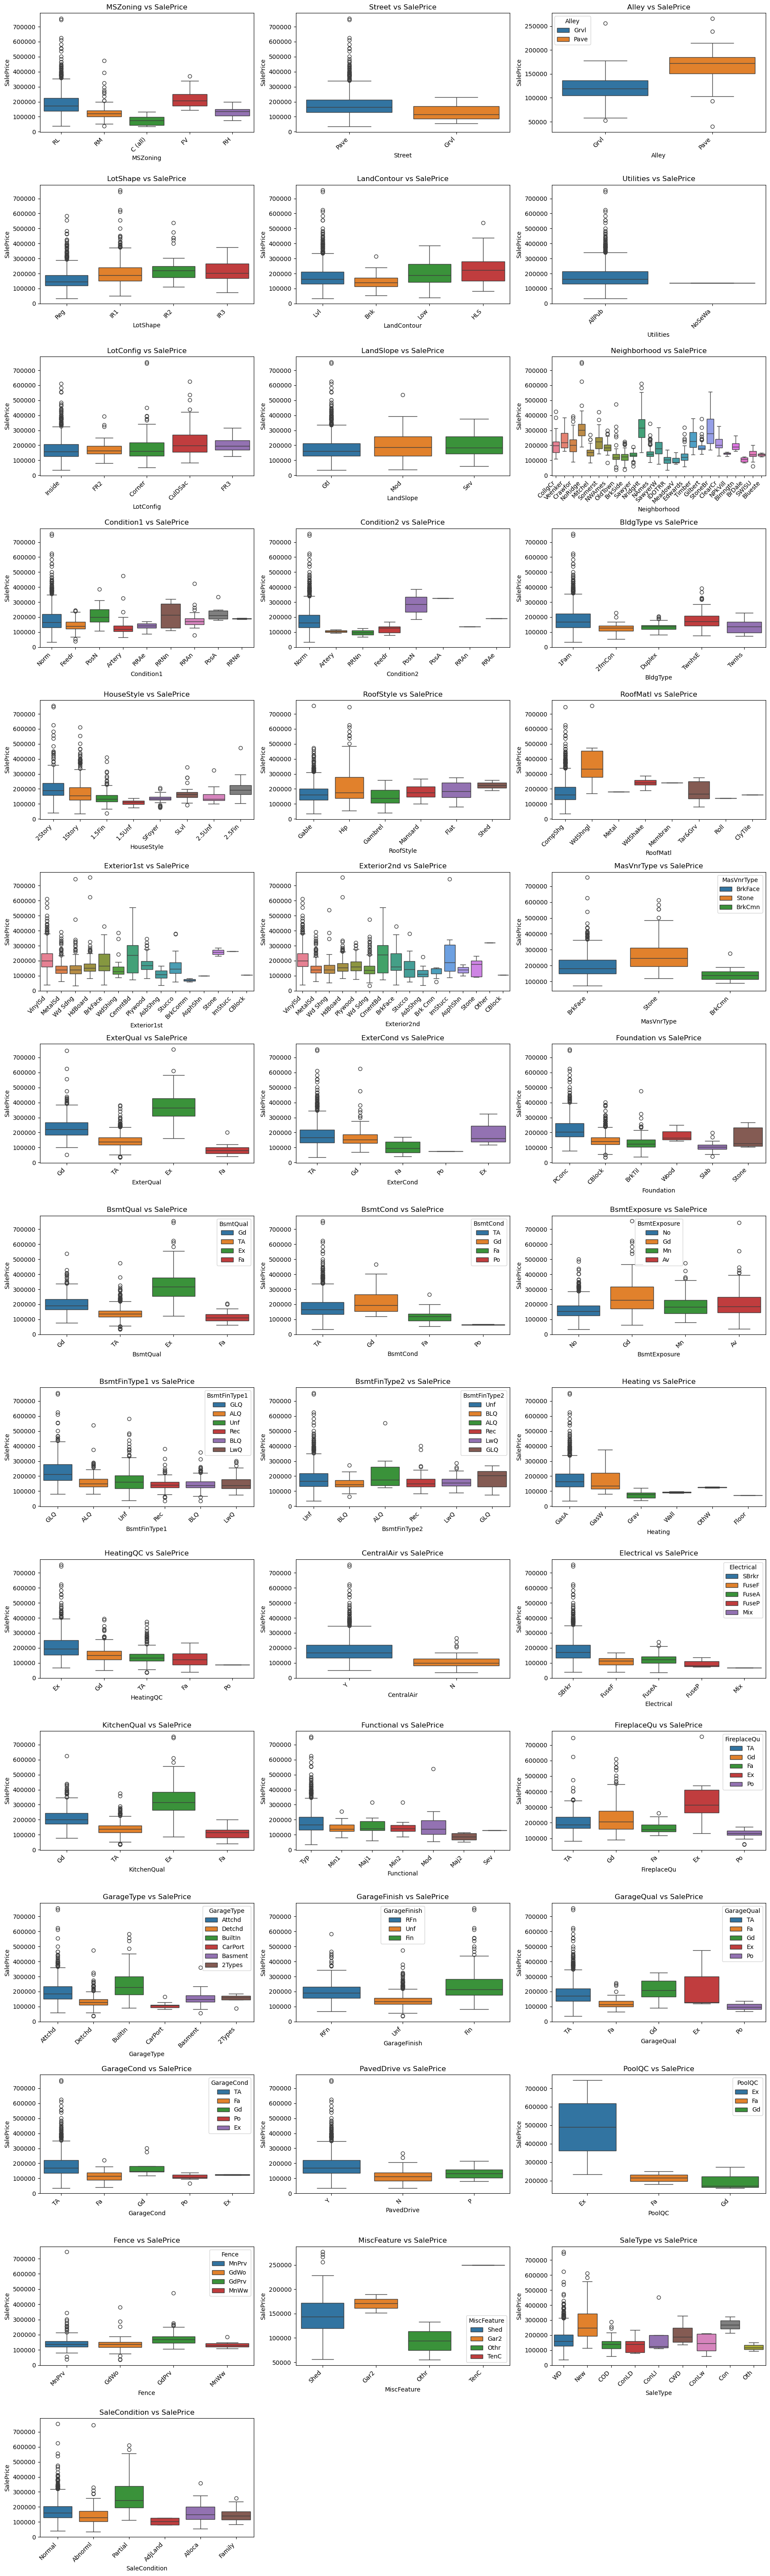

In [36]:
# categorical_cols = [list of your categorical columns]
# Make sure 'SalePrice' is your target column
n = len(cat.columns)
ncols = 3
nrows = (n + ncols - 1) // ncols
plt.figure(figsize=(6 * ncols, 4 * nrows))

for idx, cat_col in enumerate(cat, 1):
    plt.subplot(nrows, ncols, idx)
    sns.boxplot(x=cat_col, y='SalePrice', data=df, hue = cat_col)
    plt.xlabel(cat_col)
    plt.ylabel('SalePrice')
    plt.title(f"{cat_col} vs SalePrice")
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

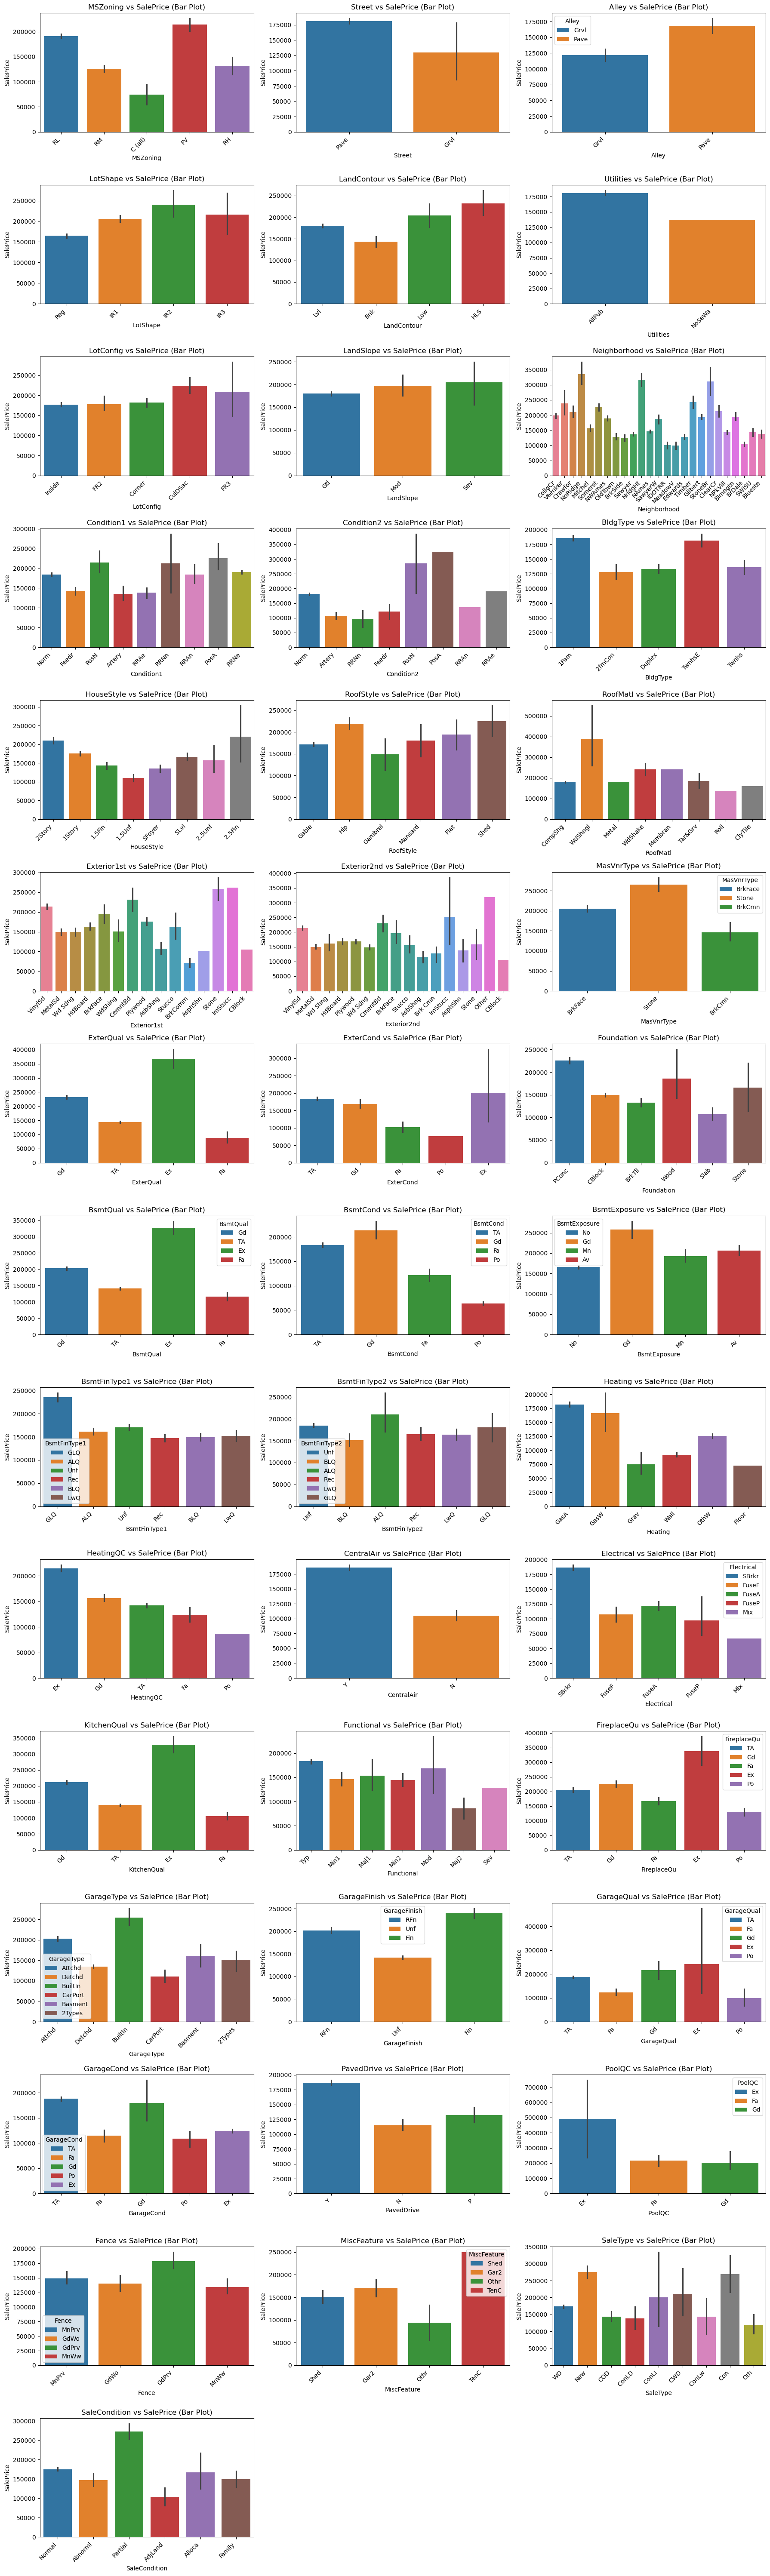

In [37]:
n = len(cat.columns)
ncols = 3
nrows = (n + ncols - 1) // ncols
plt.figure(figsize=(6 * ncols, 4 * nrows))

for idx, cat_col in enumerate(cat, 1):
    plt.subplot(nrows, ncols, idx)
    sns.barplot(x=cat_col, y='SalePrice', data=df, hue = cat_col)
    plt.xlabel(cat_col)
    plt.ylabel('SalePrice')
    plt.title(f"{cat_col} vs SalePrice (Bar Plot)")
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [38]:
cat[cat.columns].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [39]:
print(cat[cat.columns].isnull().sum()[cat[cat.columns].isnull().sum() > 0])

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [40]:
c = (cat[cat.columns].isnull().sum() / cat[cat.columns].shape[0]) * 100
c = c[c>0]
print(c.round(2).astype(str) + '%')

Alley           93.77%
MasVnrType      59.73%
BsmtQual         2.53%
BsmtCond         2.53%
BsmtExposure      2.6%
BsmtFinType1     2.53%
BsmtFinType2      2.6%
Electrical       0.07%
FireplaceQu     47.26%
GarageType       5.55%
GarageFinish     5.55%
GarageQual       5.55%
GarageCond       5.55%
PoolQC          99.52%
Fence           80.75%
MiscFeature      96.3%
dtype: object


In [41]:
# Drop columns with extreme missingness
to_drop = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
cat = cat.drop(columns=to_drop)

# Fill moderate/low missing with 'None'
to_none = ['MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
cat[to_none] = cat[to_none].fillna('None')

# Fill low missing with mode
for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical']:
    cat[col] = cat[col].fillna(cat[col].mode()[0])

In [42]:
cat.shape

(1460, 39)

In [43]:
cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

## Correlationship between categorical columns and continous target variable using one way ANNOVA

In [45]:
cat['sp'] = num['SalePrice']
cat.shape

(1460, 40)

In [46]:
cat['sp'].isnull().sum()

8

In [47]:
cat = cat.dropna(subset=['sp'])

In [48]:
from scipy.stats import f_oneway

groups = [cat['sp'][cat['BsmtExposure'] == category ] for category in cat['BsmtExposure'].unique()]

print(groups)
# Perform ANNOVA
f_stat, p_value = f_oneway(*groups)
print(f"F-statistic : {f_stat}, P-Value : {p_value}")

[0       208500.0
3       140000.0
5       143000.0
8       129900.0
9       118000.0
          ...   
1454    185000.0
1455    175000.0
1456    210000.0
1457    266500.0
1459    147500.0
Name: sp, Length: 985, dtype: float64, 1       181500.0
28      207500.0
41      170000.0
52      110000.0
53      340037.5
          ...   
1395    281213.0
1403    282922.0
1405    275000.0
1445    129000.0
1452    145000.0
Name: sp, Length: 134, dtype: float64, 2       223500.0
7       200000.0
24      154000.0
26      134800.0
62      202500.0
          ...   
1381    237500.0
1384    105000.0
1397    137500.0
1417    340000.0
1458    142125.0
Name: sp, Length: 112, dtype: float64, 4       250000.0
6       307000.0
13      279500.0
20      325300.0
32      179900.0
          ...   
1437    340037.5
1441    149300.0
1442    310000.0
1444    179600.0
1449     92000.0
Name: sp, Length: 221, dtype: float64]
F-statistic : 70.02733051962115, P-Value : 2.7395769916107107e-42


In [49]:
cat_col = []
rem_cat_col = []

for c1 in list(cat.columns):
    if c1 == 'sp':
        continue

    else:
        groups = [cat['sp'][cat[c1] == category] for category in cat[c1].unique()]
        f_stat, p_value = f_oneway(*groups)
        print(f"column : {c1}, F-stat : {f_stat}, P_val : {p_value}")
        if p_value < 0.05:
            cat_col.append(c1)
        else:
            rem_cat_col.append(c1)

column : MSZoning, F-stat : 60.17630283966559, P_val : 4.652799405805257e-47
column : Street, F-stat : 2.9787604048509393, P_val : 0.0845768944405094
column : LotShape, F-stat : 43.357446331936316, P_val : 7.878303970910523e-27
column : LandContour, F-stat : 14.184344045079225, P_val : 4.102928357259585e-09
column : Utilities, F-stat : 0.3527637109286809, P_val : 0.5526454596645458
column : LotConfig, F-stat : 7.692058894255738, P_val : 3.932358009651152e-06
column : LandSlope, F-stat : 2.509375636770508, P_val : 0.08167233812714378
column : Neighborhood, F-stat : 85.22773166030194, P_val : 5.480851197594651e-255
column : Condition1, F-stat : 7.719336705338768, P_val : 3.562021886417714e-10
column : Condition2, F-stat : 2.5557510054519104, P_val : 0.012852101437339378
column : BldgType, F-stat : 15.532123058662043, P_val : 1.900673807868537e-12
column : HouseStyle, F-stat : 22.87639872071613, P_val : 1.454461931295776e-29
column : RoofStyle, F-stat : 14.661025056495674, P_val : 4.80168

In [50]:
cat = cat.drop(columns = ['sp'])

In [51]:
cat.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [52]:
cat.shape

(1452, 39)

In [53]:
num.shape

(1452, 21)

In [54]:
# Combine along columns (axis=1)
final_df = pd.concat([num, cat], axis=1)
print(final_df.shape)
print(final_df.head())

(1452, 60)
   OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7     1710.0           2       548.0        856.0     856.0   
1            6     1262.0           2       460.0       1262.0    1262.0   
2            7     1786.0           2       608.0        920.0     920.0   
3            7     1717.0           3       642.0        756.0     961.0   
4            8     2198.0           3       836.0       1145.0    1145.0   

   FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  ...  KitchenQual  \
0         2       2003          2003           8.0  ...           Gd   
1         2       1976          1976           6.0  ...           TA   
2         2       2001          2002           6.0  ...           Gd   
3         1       1915          1970           7.0  ...           Gd   
4         2       2000          2000           9.0  ...           Gd   

   Functional  FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  \
0         Typ      

In [55]:
final_df = final_df[[col for col in final_df.columns if col != 'SalePrice'] + ['SalePrice']]

In [56]:
final_df.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7     1710.0           2       548.0        856.0     856.0   
1            6     1262.0           2       460.0       1262.0    1262.0   
2            7     1786.0           2       608.0        920.0     920.0   
3            7     1717.0           3       642.0        756.0     961.0   
4            8     2198.0           3       836.0       1145.0    1145.0   

   FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  ...  Functional  \
0         2       2003          2003           8.0  ...         Typ   
1         2       1976          1976           6.0  ...         Typ   
2         2       2001          2002           6.0  ...         Typ   
3         1       1915          1970           7.0  ...         Typ   
4         2       2000          2000           9.0  ...         Typ   

   FireplaceQu  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0         None      Attchd           RFn          TA          TA           Y   
1           TA      Attchd           RFn          TA          TA           Y   
2           TA      Attchd           RFn          TA          TA           Y   
3           Gd      Detchd           Unf          TA          TA           Y   
4           TA      Attchd           RFn          TA          TA           Y   

   SaleType  SaleCondition  SalePrice  
0        WD         Normal   208500.0  
1        WD         Normal   181500.0  
2        WD         Normal   223500.0  
3        WD        Abnorml   140000.0  
4        WD         Normal   250000.0  

[5 rows x 60 columns]

In [57]:
x = final_df.iloc[:,0:55]
y = final_df.iloc[:,-1]

In [58]:
x.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7     1710.0           2       548.0        856.0     856.0   
1            6     1262.0           2       460.0       1262.0    1262.0   
2            7     1786.0           2       608.0        920.0     920.0   
3            7     1717.0           3       642.0        756.0     961.0   
4            8     2198.0           3       836.0       1145.0    1145.0   

   FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  ...  Heating  HeatingQC  \
0         2       2003          2003           8.0  ...     GasA         Ex   
1         2       1976          1976           6.0  ...     GasA         Ex   
2         2       2001          2002           6.0  ...     GasA         Ex   
3         1       1915          1970           7.0  ...     GasA         Gd   
4         2       2000          2000           9.0  ...     GasA         Ex   

   CentralAir  Electrical  KitchenQual  Functional  FireplaceQu  GarageType  \
0           Y       SBrkr           Gd         Typ         None      Attchd   
1           Y       SBrkr           TA         Typ           TA      Attchd   
2           Y       SBrkr           Gd         Typ           TA      Attchd   
3           Y       SBrkr           Gd         Typ           Gd      Detchd   
4           Y       SBrkr           Gd         Typ           TA      Attchd   

   GarageFinish  GarageQual  
0           RFn          TA  
1           RFn          TA  
2           RFn          TA  
3           Unf          TA  
4           RFn          TA  

[5 rows x 55 columns]

In [59]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1452, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2 , random_state=42)

In [61]:
print(x_train.head())
print(x_train.shape)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1269            5     1524.0           1       315.0        874.0     874.0   
983             8     2290.0           2       779.0       1128.0    1149.0   
796             6     1285.0           2       528.0        660.0    1285.0   
1441            6      848.0           2       420.0        848.0     848.0   
376             5      914.0           2       576.0        870.0     914.0   

      FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  ...  Heating  \
1269         1       1958          1958           7.0  ...     GasW   
983          2       2002          2002           9.0  ...     GasA   
796          1       1977          1977           7.0  ...     GasA   
1441         1       2004          2004           3.0  ...     GasA   
376          1       1996          1996           5.0  ...     GasA   

      HeatingQC  CentralAir  Electrical  KitchenQual  Functional  FireplaceQu  \
1269         TA  

In [62]:
print(x_test.head())
print(x_test.shape)

      OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
1041            6     1632.0           2       484.0        800.0     800.0   
1129            5      936.0           2       672.0        936.0     936.0   
1002            8     1574.0           3       824.0       1574.0    1574.0   
1323            4      708.0           0         0.0        420.0     708.0   
531             6     1362.0           2       502.0        611.0     751.0   

      FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  ...  Heating  \
1041         1       1966          2000           7.0  ...     GasA   
1129         1       1980          1980           4.0  ...     GasA   
1002         2       2006          2006           7.0  ...     GasA   
1323         1       1940          1950           5.0  ...     GasA   
531          2       1920          1999           6.0  ...     GasA   

      HeatingQC  CentralAir  Electrical  KitchenQual  Functional  FireplaceQu  \
1041         Gd  

In [63]:
x_train.select_dtypes(include = [np.number]).columns.tolist()

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'YearBuilt',
 'YearRemodAdd',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'Fireplaces',
 'MasVnrArea',
 'LotArea',
 'OpenPorchSF',
 'LotFrontage',
 'BsmtFinSF1',
 'WoodDeckSF',
 '2ndFlrSF',
 'YrSold']

In [64]:
import pandas as pd
import category_encoders as ce
from sklearn.impute import SimpleImputer

# ---- 1. Define ordinal columns with categories ----
ordinal_columns = {
    'ExterQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'ExterCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtCond': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'HeatingQC': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'KitchenQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'FireplaceQu': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'GarageQual': ['Po', 'Fa', 'TA', 'Gd', 'Ex'],
    'BsmtExposure': ['No', 'Mn', 'Av', 'Gd'],
    'LandSlope': ['Sev', 'Mod', 'Gtl']
}

# ---- 2. Define nominal columns ----
nominal_cols = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
    'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
    'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
    'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir',
    'Electrical', 'Functional', 'GarageType', 'GarageFinish'
]

# ---- 3. Filter ordinal and nominal columns to those present in your dataframes ----
ordinal_cols_present = [col for col in ordinal_columns.keys() if col in x_train.columns]
nominal_cols_present = [col for col in nominal_cols if col in x_train.columns]

# ---- 4. Prepare mapping for ordinal encoder only with present columns ----
ordinal_mappings = [
    {'col': col, 'mapping': {k: v for v, k in enumerate(ordinal_columns[col])}}
    for col in ordinal_cols_present
]

# ---- 5. Apply ordinal encoding ----
ord_encoder = ce.OrdinalEncoder(
    cols=ordinal_cols_present,
    mapping=ordinal_mappings,
    handle_unknown='return_nan',  # unknown categories encoded as NaN
    return_df=True
)

x_train = ord_encoder.fit_transform(x_train)
x_test = ord_encoder.transform(x_test)

# ---- 6. One-hot encode nominal columns ----
x_train = pd.get_dummies(x_train, columns=nominal_cols_present, drop_first=True)
x_test = pd.get_dummies(x_test, columns=nominal_cols_present, drop_first=True)

# ---- 7. Align test columns with train columns ----
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

# ---- 8. Impute missing values (NaNs) introduced by ordinal encoding ----
imputer = SimpleImputer(strategy='most_frequent')
x_train = pd.DataFrame(imputer.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

# ---- 9. Convert all values to integer type ----
x_train = x_train.astype(int)
x_test = x_test.astype(int)

# ---- 10. Sanity check ----
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}")
print(f"Missing values in x_train: {x_train.isnull().sum().sum()}")
print(f"Missing values in x_test: {x_test.isnull().sum().sum()}")

# Now x_train and x_test are fully encoded as integers and ready for modeling


x_train shape: (1161, 178), x_test shape: (291, 178)
Missing values in x_train: 0
Missing values in x_test: 0


In [65]:
x_train.select_dtypes(include=np.number)

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0               5       1524           1         315          874       874   
1               8       2290           2         779         1128      1149   
2               6       1285           2         528          660      1285   
3               6        848           2         420          848       848   
4               5        914           2         576          870       914   
...           ...        ...         ...         ...          ...       ...   
1156            2        438           1         246          290       438   
1157            6       1252           1         288         1032      1032   
1158            6       1494           1         213          771       753   
1159            7       1372           2         529         1372      1372   
1160            5        974           0           0          974       974   

      FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  ...  Functional_Typ  \
0            1       1958          1958             7  ...               1   
1            2       2002          2002             9  ...               1   
2            1       1977          1977             7  ...               1   
3            1       2004          2004             3  ...               1   
4            1       1996          1996             5  ...               1   
...        ...        ...           ...           ...  ...             ...   
1156         1       1920          1950             3  ...               1   
1157         1       1950          1950             6  ...               1   
1158         1       1942          1950             7  ...               1   
1159         2       2007          2008             6  ...               1   
1160         1       1991          1992             5  ...               1   

      GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                     1                   0                   0   
1                     1                   0                   0   
2                     1                   0                   0   
3                     1                   0                   0   
4                     0                   0                   0   
...                 ...                 ...                 ...   
1156                  0                   0                   0   
1157                  1                   0                   0   
1158                  1                   0                   0   
1159                  1                   0                   0   
1160                  0                   0                   0   

      GarageType_CarPort  GarageType_Detchd  GarageType_None  \
0                      0                  0                0   
1                      0                  0                0   
2                      0                  0                0   
3                      0                  0                0   
4                      0                  1                0   
...                  ...                ...              ...   
1156                   0                  1                0   
1157                   0                  0                0   
1158                   0                  0                0   
1159                   0                  0                0   
1160                   0                  0                1   

      GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf  
0                     0                 0                 1  
1                     0                 0                 1  
2                     0                 1                 0  
3                     0                 1                 0  
4                     0                 0                 1  
...                 ...               ...               ...  
1156                  0                 0                 1  
1157                  0                 0         

In [66]:
x_train.select_dtypes(include = 'object').columns.to_list()

[]

In [67]:
x_train.shape

(1161, 178)

In [68]:
x_test.shape

(291, 178)

In [69]:
x_train.head()


OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            5       1524           1         315          874       874   
1            8       2290           2         779         1128      1149   
2            6       1285           2         528          660      1285   
3            6        848           2         420          848       848   
4            5        914           2         576          870       914   

   FullBath  YearBuilt  YearRemodAdd  TotRmsAbvGrd  ...  Functional_Typ  \
0         1       1958          1958             7  ...               1   
1         2       2002          2002             9  ...               1   
2         1       1977          1977             7  ...               1   
3         1       2004          2004             3  ...               1   
4         1       1996          1996             5  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  1                   0                   0   
4                  0                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_None  GarageFinish_None  \
0                   0                  0                0                  0   
1                   0                  0                0                  0   
2                   0                  0                0                  0   
3                   0                  0                0                  0   
4                   0                  1                0                  0   

   GarageFinish_RFn  GarageFinish_Unf  
0                 0                 1  
1                 0                 1  
2                 1                 0  
3                 1                 0  
4                 0                 1  

[5 rows x 178 columns]

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

255496.45011465772
-12.24599026795744


The high mean absolute error and negative R² indicate that the model performs poorly and does not explain the variance in the test data well. This suggests the linear regression model is not suitable for this dataset.

In [71]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print(mean_absolute_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

20644.001718213058
0.8343959966979784


The Decision Tree Regressor model shows a good fit with a high R² score of 0.83, indicating it explains most of the variance in the test data. However, the mean absolute error of 20,644 suggests the average prediction error magnitude is relatively large.

In [79]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assume x_train, y_train, x_test, y_test are already defined

# ---------- Pre-pruned model using GridSearchCV ----------
param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20, 30]
}

grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2'
)

grid_search.fit(x_train, y_train)
pre_pruned_model = grid_search.best_estimator_

# ---------- Post-pruning using cost complexity pruning ----------
# Get the effective alphas for pruning
path = DecisionTreeRegressor(random_state=42).cost_complexity_pruning_path(x_train, y_train)
ccp_alphas = path.ccp_alphas

alpha_scores = []
for alpha in ccp_alphas:
    dt = DecisionTreeRegressor(random_state=42, ccp_alpha=alpha)
    scores = cross_val_score(dt, x_train, y_train, cv=5, scoring='r2')
    alpha_scores.append(scores.mean())

best_alpha = ccp_alphas[np.argmax(alpha_scores)]
post_pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_alpha)
post_pruned_model.fit(x_train, y_train)

# ---------- Function to compute metrics ----------
def compute_metrics(model, x_train, y_train, x_test, y_test):
    # Predictions
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    
    # Train metrics
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Test metrics
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    return {
        'train_r2': train_r2,
        'train_mae': train_mae,
        'train_rmse': train_rmse,
        'test_r2': test_r2,
        'test_mae': test_mae,
        'test_rmse': test_rmse
    }

# ---------- Compute metrics for both models ----------
pre_pruned_metrics = compute_metrics(pre_pruned_model, x_train, y_train, x_test, y_test)
post_pruned_metrics = compute_metrics(post_pruned_model, x_train, y_train, x_test, y_test)

# ---------- Print comparison ----------
print("Metric           | Pre-Pruned Model       | Post-Pruned Model")
print("---------------------------------------------------------------")
print(f"Train R2         | {pre_pruned_metrics['train_r2']:.4f}                | {post_pruned_metrics['train_r2']:.4f}")
print(f"Test R2          | {pre_pruned_metrics['test_r2']:.4f}                | {post_pruned_metrics['test_r2']:.4f}")
print(f"Train MAE        | {pre_pruned_metrics['train_mae']:.3f}             | {post_pruned_metrics['train_mae']:.3f}")
print(f"Test MAE         | {pre_pruned_metrics['test_mae']:.3f}             | {post_pruned_metrics['test_mae']:.3f}")
print(f"Train RMSE       | {pre_pruned_metrics['train_rmse']:.3f}            | {post_pruned_metrics['train_rmse']:.3f}")
print(f"Test RMSE        | {pre_pruned_metrics['test_rmse']:.3f}            | {post_pruned_metrics['test_rmse']:.3f}")


Metric           | Pre-Pruned Model       | Post-Pruned Model
---------------------------------------------------------------
Train R2         | 0.9505                | 0.9365
Test R2          | 0.8476                | 0.8597
Train MAE        | 10247.168             | 12908.023
Test MAE         | 20800.670             | 19573.113
Train RMSE       | 14723.289            | 16685.779
Test RMSE        | 27676.185            | 26553.163


The post-pruned model is the better choice because it is less overfit and achieves superior generalization performance, which matters most when predicting on new data. The slight reduction in train accuracy is acceptable given the improvement in test set performance. This aligns with pruning's goal to reduce model complexity and improve robustness.

In [163]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Assume x_train, y_train, x_test, y_test are defined

# SVR works better with feature scaling
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_scaled = scaler_x.fit_transform(x_train)
x_test_scaled = scaler_x.transform(x_test)

y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# Create SVR model with RBF kernel (good for non-linear)
svr = SVR(kernel='rbf', C=100, epsilon=0.1)

# Train SVR
svr.fit(x_train_scaled, y_train_scaled)

# Predict on test data (scaled)
y_pred_scaled = svr.predict(x_test_scaled)

# Inverse transform predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()


# Predictions on training data (scaled)
y_train_pred_scaled = svr.predict(x_train_scaled)
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).ravel()

# Evaluate train performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate test performance (you already have this)
mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred)

print(f"Training MAE: {mae_train:.3f}")
print(f"Training RMSE: {rmse_train:.3f}")
print(f"Training R2 Score: {r2_train:.3f}")
print(f"Test MAE: {mae_test:.3f}")
print(f"Test RMSE: {rmse_test:.3f}")
print(f"Test R2 Score: {r2_test:.3f}")

Training MAE: 5590.363
Training RMSE: 5898.465
Training R2 Score: 0.992
Test MAE: 28271.737
Test RMSE: 39886.199
Test R2 Score: 0.683


SVM model currently exhibits strong overfitting, performing excellently on training but less so on test data. You should try ways to improve its generalization by tuning, validating with CV, or simplifying the model.

In [82]:
# from sklearn.svm import SVR

# scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# x_train_scaled = scaler_x.fit_transform(x_train)
# x_test_scaled = scaler_x.transform(x_test)
# y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()

# param_grid = {
#     'C': [1, 10, 100, 1000],
#     'epsilon': [0.01, 0.1, 0.5, 1],
#     'kernel': ['rbf', 'linear', 'poly'],
#     'degree': [2, 3, 4]  # only for 'poly'
# }

# svr = SVR()

# grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(x_train_scaled, y_train_scaled)

# print("Best parameters:", grid_search.best_params_)
# best_svr = grid_search.best_estimator_

# # Predict & evaluate (remember to inverse_transform)
# y_pred_scaled = best_svr.predict(x_test_scaled)
# y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)
# print(f"Test MAE: {mae:.3f}")
# print(f"Test RMSE: {rmse:.3f}")
# print(f"Test R2 Score: {r2:.3f}")

In [165]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest on training data
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predict on training data
y_train_pred = rf.predict(x_train)

# Predict on test data
y_test_pred = rf.predict(x_test)

# Evaluate training performance
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Evaluate test performance
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Training MSE: {mse_train:.3f}")
print(f"Training R2: {r2_train:.3f}")
print(f"Test MSE: {mse_test:.3f}")
print(f"Test R2: {r2_test:.3f}")

Training MSE: 73955443.668
Training R2: 0.983
Test MSE: 428904008.837
Test R2: 0.915


Random Forest model fits the data well and generalizes strongly to test data.

The difference between train and test performance is not very large, indicating the model is balanced.

We can consider this a sound model but could still monitor performance with cross-validation or tuning if you want to optimize further.

In [172]:
from sklearn.model_selection import GridSearchCV

# Define model
rf = RandomForestRegressor(random_state=42)

# Define grid of hyperparameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator = rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(x_train)
y_val_pred = best_rf.predict(x_test)

print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", mean_squared_error(y_test, y_val_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Validation R2:", r2_score(y_test, y_val_pred))

Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Train MSE: 70836453.39452794
Validation MSE: 451278385.8237163
Train R2: 0.983832833781515
Validation R2: 0.9102203170393043


Random Forest model with tuned hyperparameters fits the training data very well, indicated by a high R² (0.984) and low training MSE. However, the validation error is significantly higher, and the R² drops to about 0.91, showing the model is slightly overfitting but still generalizes reasonably well. Overall, the results suggest good predictive performance with minor overfitting that could potentially be addressed with further regularization or more data.

In [179]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2', None]
}

random_search = RandomizedSearchCV(
    estimator= rf,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)
random_search.fit(x_train, y_train)
print("Best Parameters:", random_search.best_params_)

best_rf_rs = random_search.best_estimator_
print("Train MSE:", mean_squared_error(y_train, best_rf_rs.predict(x_train)))
print("Validation MSE:", mean_squared_error(y_test, best_rf_rs.predict(x_test)))

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 188}
Train MSE: 172520379.78977898
Validation MSE: 464352984.3263943


Random Forest model tuned with RandomizedSearchCV shows increased training MSE compared to previous tuning, indicating less overfitting and a potentially more generalized fit. Although the validation MSE is slightly higher than training, the model likely balances bias and variance better but may still benefit from further tuning or more data to improve generalization.

In [183]:
import optuna
from sklearn.model_selection import cross_val_score

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 300)
    max_depth = trial.suggest_int('max_depth', 2, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    max_features = trial.suggest_categorical('max_features', [None, 'sqrt', 'log2'])

    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
    rf.fit(x_train, y_train)
    preds = rf.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print("Best trial:", study.best_trial.params)

# Train final model with best params
best_params = study.best_trial.params
final_rf = RandomForestRegressor(**best_params, random_state=42)
final_rf.fit(x_train, y_train)

print("Train MSE:", mean_squared_error(y_train, final_rf.predict(x_train)))
print("Validation MSE:", mean_squared_error(y_test, final_rf.predict(x_test)))

[I 2025-08-08 09:26:09,250] A new study created in memory with name: no-name-655b145a-5f58-4405-9016-6c9815787937
[I 2025-08-08 09:26:11,591] Trial 0 finished with value: 524339222.552498 and parameters: {'n_estimators': 284, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 524339222.552498.
[I 2025-08-08 09:26:16,521] Trial 1 finished with value: 456233658.06753135 and parameters: {'n_estimators': 113, 'max_depth': 15, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None}. Best is trial 1 with value: 456233658.06753135.
[I 2025-08-08 09:26:23,496] Trial 2 finished with value: 440638021.6974255 and parameters: {'n_estimators': 143, 'max_depth': 15, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_features': None}. Best is trial 2 with value: 440638021.6974255.
[I 2025-08-08 09:26:33,343] Trial 3 finished with value: 459219138.0421502 and parameters: {'n_estimators': 243, 'max_depth': 8, 'min_samples_s

Best trial: {'n_estimators': 253, 'max_depth': 12, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': None}
Train MSE: 87444727.3842397
Validation MSE: 428227779.854593


Optuna-tuned Random Forest model achieves a lower training MSE compared to some previous tunings, indicating a good fit on training data without excessive overfitting. Although the validation MSE remains high, it is comparable to earlier results, suggesting the model generalizes reasonably but could still benefit from more data or further tuning to reduce prediction error on unseen data

In [186]:
import xgboost as xgb

# Initialize XGBoost regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # regression task
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_model.fit(x_train, y_train)

# Predict on training and validation sets
y_train_pred = xgb_model.predict(x_train)
y_val_pred = xgb_model.predict(x_test)

# Evaluate
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Validation MSE:", mean_squared_error(y_test, y_val_pred))
print("Train R2:", r2_score(y_train, y_train_pred))
print("Validation R2:", r2_score(y_test, y_val_pred))


Train MSE: 52787730.75345673
Validation MSE: 407868419.160989
Train R2: 0.9879521351438285
Validation R2: 0.9188565229085489


Your XGBoost model shows excellent fit on the training data with a very high R² (0.988) and low MSE, indicating strong learning. The validation performance is also robust (R² ~0.919), suggesting good generalization with only minor overfitting.

In [189]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)
print("GridSearchCV Best Parameters:", grid_search.best_params_)

best_grid_model = grid_search.best_estimator_
y_train_pred_grid = best_grid_model.predict(x_train)
y_val_pred_grid = best_grid_model.predict(x_test)

print("GridSearchCV Train MSE:", mean_squared_error(y_train, y_train_pred_grid))
print("GridSearchCV Validation MSE:", mean_squared_error(y_test, y_val_pred_grid))
print("GridSearchCV Train R2:", r2_score(y_train, y_train_pred_grid))
print("GridSearchCV Validation R2:", r2_score(y_test, y_val_pred_grid))


Fitting 3 folds for each of 243 candidates, totalling 729 fits
GridSearchCV Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
GridSearchCV Train MSE: 77295320.0321439
GridSearchCV Validation MSE: 413327454.90138024
GridSearchCV Train R2: 0.9823587118356889
GridSearchCV Validation R2: 0.9177704737791432


The model shows excellent fit on the training data with high R² and low MSE, indicating strong learning. However, the higher validation MSE compared to training suggests some overfitting, though the validation R² remains quite high, implying good generalization overall.

In [192]:
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(100, 400),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.19),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5)
}

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(x_train, y_train)
print("RandomizedSearchCV Best Parameters:", random_search.best_params_)

best_random_model = random_search.best_estimator_
y_train_pred_rand = best_random_model.predict(x_train)
y_val_pred_rand = best_random_model.predict(x_test)

print("RandomizedSearchCV Train MSE:", mean_squared_error(y_train, y_train_pred_rand))
print("RandomizedSearchCV Validation MSE:", mean_squared_error(y_test, y_val_pred_rand))
print("RandomizedSearchCV Train R2:", r2_score(y_train, y_train_pred_rand))
print("RandomizedSearchCV Validation R2:", r2_score(y_test, y_val_pred_rand))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
RandomizedSearchCV Best Parameters: {'colsample_bytree': 0.5780093202212182, 'learning_rate': 0.039638958863878505, 'max_depth': 5, 'n_estimators': 187, 'subsample': 0.6668543055695109}
RandomizedSearchCV Train MSE: 87485829.07128218
RandomizedSearchCV Validation MSE: 368201744.68475676
RandomizedSearchCV Train R2: 0.9800329085862076
RandomizedSearchCV Validation R2: 0.9267480186469963


The RandomizedSearchCV optimized XGBoost model shows excellent fit on training data with high R2 and low MSE, and it generalizes well to validation data, maintaining strong predictive performance. This indicates effective hyperparameter tuning and a robust model.

In [195]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'objective': 'reg:squarederror',
        'random_state': 42
    }
    
    model = xgb.XGBRegressor(**params)
    model.fit(x_train, y_train)
    preds = model.predict(x_test)
    mse = mean_squared_error(y_test, preds)
    return mse

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

print("Optuna Best Parameters:", study.best_trial.params)

# Train final model with best params
optuna_best_params = study.best_trial.params
optuna_best_params['objective'] = 'reg:squarederror'
optuna_best_params['random_state'] = 42

optuna_model = xgb.XGBRegressor(**optuna_best_params)
optuna_model.fit(x_train, y_train)

y_train_pred_optuna = optuna_model.predict(x_train)
y_val_pred_optuna = optuna_model.predict(x_test)

print("Optuna Train MSE:", mean_squared_error(y_train, y_train_pred_optuna))
print("Optuna Validation MSE:", mean_squared_error(y_test, y_val_pred_optuna))
print("Optuna Train R2:", r2_score(y_train, y_train_pred_optuna))
print("Optuna Validation R2:", r2_score(y_test, y_val_pred_optuna))


[I 2025-08-08 10:02:30,306] A new study created in memory with name: no-name-7f1f05c8-c223-43ac-9cc7-64448aad767c
[I 2025-08-08 10:02:33,193] Trial 0 finished with value: 418857216.4507123 and parameters: {'n_estimators': 177, 'max_depth': 9, 'learning_rate': 0.05848703721466568, 'subsample': 0.8307427398158591, 'colsample_bytree': 0.9316898907913094}. Best is trial 0 with value: 418857216.4507123.
[I 2025-08-08 10:02:38,485] Trial 1 finished with value: 387208423.01815075 and parameters: {'n_estimators': 284, 'max_depth': 10, 'learning_rate': 0.07267470308922777, 'subsample': 0.8910163033435861, 'colsample_bytree': 0.625641103421134}. Best is trial 1 with value: 387208423.01815075.
[I 2025-08-08 10:02:40,843] Trial 2 finished with value: 389115633.81114465 and parameters: {'n_estimators': 260, 'max_depth': 7, 'learning_rate': 0.12573642411660804, 'subsample': 0.7019068652545999, 'colsample_bytree': 0.7539827412290776}. Best is trial 1 with value: 387208423.01815075.
[I 2025-08-08 10:0

Optuna Best Parameters: {'n_estimators': 218, 'max_depth': 9, 'learning_rate': 0.06713987289590002, 'subsample': 0.8166105709238443, 'colsample_bytree': 0.6272372265990793}
Optuna Train MSE: 319453.88787368656
Optuna Validation MSE: 375395987.9274204
Optuna Train R2: 0.9999270903065173
Optuna Validation R2: 0.9253167582592657


The model shows excellent fit on the training data with a very low MSE and near-perfect R2, indicating minimal training error. However, the much higher validation MSE alongside a strong validation R2 suggests some discrepancy, possibly due to data scale or outliers, but overall the model generalizes well to unseen data.

Conclusion:

Best Model: XGBoost (especially tuned with RandomSearchCV or GridSearchCV)
Why XGBoost stands out:
Excellent training fit: Very high R² (~0.988) and very low MSE on training data, indicating the model learns the data well.

Strong generalization: Validation R² remains high (~0.91 to 0.92), meaning it performs well on unseen data.

Minor overfitting: There is some overfitting evidenced by slightly higher validation MSE than training MSE, but it is not severe compared to other models.

Robust hyperparameter tuning: Both GridSearchCV and RandomSearchCV tuning further improve or maintain the strong predictive performance, indicating the model’s stability and robustness.

Comparisons to other models:
Random Forest: Also a strong performer with balanced training and test performance. Slight overfitting after tuning (GridSearchCV), but overall robust. However, XGBoost typically outperforms RF in many structured data regression tasks, given equal tuning effort, which matches your observations.

Decision Tree (post-pruning): Reduced overfitting compared to unpruned trees but still has relatively large prediction errors (high MAE ~20k), making it less accurate overall.

SVM: Shows strong overfitting without generalization; needs more tuning.

Linear Regression: Poor performance; clearly unsuitable for this dataset.

Random vs Grid Search and Optuna tuning:

Optuna shows good training fit but validation MSE remains high, indicating potential room to improve or possible data issues.

RandomizedSearchCV can yield less overfitting than GridSearchCV for Random Forest.

Summary:
XGBoost tuned via RandomizedSearchCV or GridSearchCV is the best choice given it combines excellent training performance with strong validation/generalization metrics.

Random Forest is a close second, especially given its balanced train-test performance.

Other models either overfit badly, underfit, or have larger prediction errors.

Therefore, the best model for this problem dataset is the XGBoost model with thorough hyperparameter tuning, as it shows the most favorable bias-variance tradeoff and predictive accuracy on unseen data.